# HOUSING: PRICE PREDICTION

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate  market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?



Business Goal:
    
    
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading The Datasets

In [2]:
df_train = pd.read_csv(r"C:\Users\invra\Downloads\Project-Housing\Project-Housing_splitted\train.csv")
df_test = pd.read_csv(r"C:\Users\invra\Downloads\Project-Housing\Project-Housing_splitted\test.csv")

In [3]:
df_train.shape,df_test.shape

((1168, 81), (292, 80))

We have two datasets here, One is Train and other is test.

Test dataset has one column less than the train dataset

In [4]:
df_train.columns, df_test.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

Here we can see that the SalePrice colummn is the extra column in Train dataset, which is to be findout for the test dataset.

So our tartget variable is SalePrice

In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [8]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [9]:
features_description = open(r"C:\Users\invra\Downloads\Project-Housing\Project-Housing_splitted\Data Description.txt")
print(features_description.read())
features_description.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
#save the ID column
train_ID =df_train['Id']
test_ID = df_test['Id']

In [11]:
#Drop the ID column since it is unnecessary for the prediction process
df_train.drop("Id",axis =1,inplace = True)
df_test.drop("Id",axis =1,inplace= True)

In [12]:
df_train.columns, df_test.columns

(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'Pa

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

There are null values in the following columns

LotFrontage, Alley.,MasVnrType,MasVnrArea, BsmtExposure,BsmtCond ,BsmtFinType2,FireplaceQu ,GarageType,GarageYrBlt,GarageFinish,
GarageQual,GarageCond,PoolQC ,Fence ,MiscFeature,

There are so many missing values in different columns. Alley,PoolQC,Fence, and MiscFeature have more than 80% of missing values.

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

There are so many missing values in different columns. Alley,PoolQC,Fence, and MiscFeature have more than 80% of missing values.

# Data Analysis

In [15]:
# For numerical columns in train DataSet
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260  ...   
std      30.145255     20.785185   182.595606   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [16]:
# For object type/categorical columns
df_train.select_dtypes(include="object").describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    77     1168        1168      1168      1168   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        928   1164    41      740        1046      1168       842   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1168         1168       1168  ...       1104         1104   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1105          182       1005  ...        691          487   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1104       1104       1168      7    237          44     1168   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1050       1061       1071      3    129          40      999   

       SaleCondition  
count           1168  
unique             6  
top           Normal  
freq             945  

[4 rows x 43 columns]

In [17]:
# For Test Data numerical columns
df_test.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   247.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    21.726343   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    53.500000    7200.000000     5.000000     5.000000   
50%     50.000000    65.000000    9200.000000     6.000000     5.000000   
75%     70.000000    79.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count   292.000000    292.000000   291.000000   292.000000   292.000000  ...   
mean   1972.616438   1985.294521   109.171821   439.294521    46.157534  ...   
std      30.447016     20.105792   175.030021   429.559675   152.467119  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1968.000000     0.000000     0.000000     0.000000  ...   
50%    1976.000000   1994.000000     0.000000   369.500000     0.000000  ...   
75%    2001.000000   2003.250000   180.000000   700.500000     0.000000  ...   
max    2009.000000   2010.000000  1031.000000  1767.000000  1085.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 37 columns]

In [18]:
# For test data object/categorical columns
df_test.select_dtypes(include="object").describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count       292    292    14      292         292       292       292   
unique        4      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        223    290     9      185         265       291       210   

       LandSlope Neighborhood Condition1  ... FireplaceQu GarageType  \
count        292          292        292  ...         153        275   
unique         3           24          8  ...           5          6   
top          Gtl        NAmes       Norm  ...          Gd     Attchd   
freq         277           43        255  ...          79        179   

       GarageFinish GarageQual GarageCond PavedDrive  Fence MiscFeature  \
count           275        275        275        292     44          10   
unique            3          5          5          3      4           2   
top             Unf         TA         TA          Y  MnPrv        Shed   
freq            118        261        265        269     28           9   

       SaleType SaleCondition  
count       292           292  
unique        6             4  
top          WD        Normal  
freq        268           253  

[4 rows x 42 columns]

In [19]:
# For train data

for i in df_train.select_dtypes(include ="object"):
    print(i)
    print(df_train.select_dtypes(include ="object")[i].value_counts())
    print('\n')

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities
AllPub    1168
Name: Utilities, dtype: int64


LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV  

In [20]:
#For test data

for i in df_test.select_dtypes(include ="object"):
    print(i)
    print(df_test.select_dtypes(include ="object")[i].value_counts())
    print('\n')

MSZoning
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64


Street
Pave    290
Grvl      2
Name: Street, dtype: int64


Alley
Grvl    9
Pave    5
Name: Alley, dtype: int64


LotShape
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64


LandContour
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64


Utilities
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64


LotConfig
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64


LandSlope
Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64


Neighborhood
NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Gilbert    15
Mitchel    15
Timber     14
Sawyer     14
NWAmes     14
MeadowV     8
SawyerW     8
BrkSide     8
IDOTRR      7
NoRidge     6
StoneBr     6
Crawfor     6
BrDale      5
SWISU       4
ClearCr     4
Blmngtn     2
Veenker     2
NPkVill     1
N

# Treating Null Values

In [21]:
#For Train data
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<AxesSubplot:>

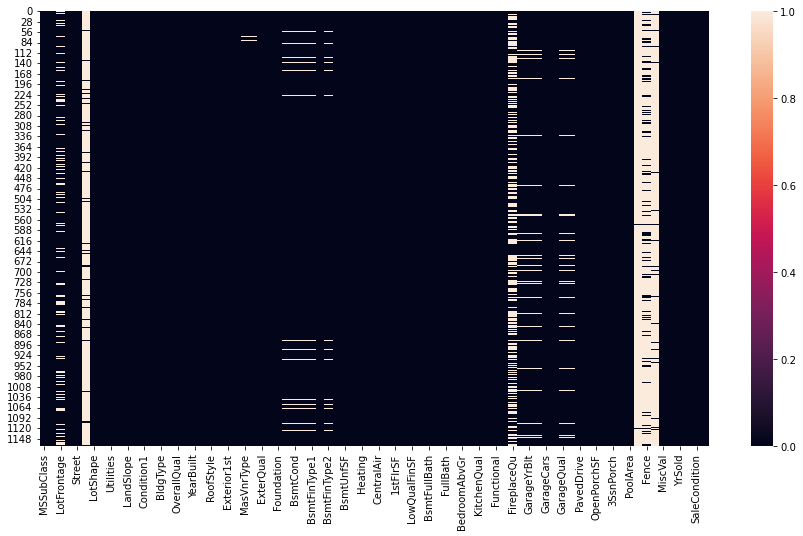

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.isnull())

In [23]:
# For test data
df_test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [24]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

df_test["Electrical"]= imp.fit_transform(df_test["Electrical"].values.reshape(-1,1))
df_train["GarageCond"]= imp.fit_transform(df_train["GarageCond"].values.reshape(-1,1))
df_test["GarageCond"]= imp.fit_transform(df_test["GarageCond"].values.reshape(-1,1))

In [25]:
# have null columns with dtype = object
null_object_col = df_train.loc[:,df_train.isnull().sum() != 0].loc[:,df_train.loc[:,df_train.isnull().sum() != 0].dtypes == 'O'].columns
null_object_col

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [26]:
# have null columns with dtype = numeric
null_num_col = df_train.loc[:,df_train.isnull().sum() != 0].loc[:,df_train.loc[:,df_train.isnull().sum() != 0].dtypes != 'O'].columns
null_num_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [27]:
# handle null values on object columns training set
for i in null_object_col:
    df_train[i].fillna('Not available', inplace=True)
    
# handle null values on object columns test set
for i in null_object_col:
    df_test[i].fillna('Not available', inplace=True)

In [28]:
# handle null values on LotFrontage columns on training set
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)


# handle null values on LotFrontage columns on test set
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)

In [29]:
df_train.isnull().sum().sum()

0

In [30]:
df_test.isnull().sum().sum()

0

Now there is no null values in the both the datasets.

In [31]:
categorial_features = df_train.select_dtypes(include=[np.object])
categorial_features.head()

MSZoning Street          Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  Not available      IR1         Lvl    AllPub    Inside   
1       RL   Pave  Not available      IR1         Lvl    AllPub    Inside   
2       RL   Pave  Not available      IR1         Lvl    AllPub   CulDSac   
3       RL   Pave  Not available      IR1         Lvl    AllPub    Inside   
4       RL   Pave  Not available      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0       Gtl      NPkVill       Norm  ...     Attchd          RFn         TA   
1       Mod        NAmes       Norm  ...     Attchd          Unf         TA   
2       Gtl      NoRidge       Norm  ...     Attchd          Unf         TA   
3       Gtl       NWAmes       Norm  ...     Attchd          RFn         TA   
4       Gtl       NWAmes       Norm  ...     Attchd          Fin         TA   

  GarageCond PavedDrive         PoolQC          Fence    MiscFeature SaleType  \
0         TA          Y  Not available  Not available  Not available       WD   
1         TA          Y  Not available  Not available  Not available       WD   
2         TA          Y  Not available  Not available  Not available       WD   
3         TA          Y  Not available          MnPrv  Not available      COD   
4         TA          Y  Not available  Not available  Not available       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 43 columns]

In [32]:
numerical_features = df_train.select_dtypes(include=[np.number])
numerical_features.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120     70.98847     4928            6            5       1976   
1          20     95.00000    15865            8            6       1970   
2          60     92.00000     9920            7            5       1996   
3          20    105.00000    11751            6            6       1977   
4          20     70.98847    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1976         0.0         120           0  ...           0   
1          1970         0.0         351         823  ...          81   
2          1997         0.0         862           0  ...         180   
3          1977       480.0         705           0  ...           0   
4          2000       126.0        1246           0  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 37 columns]

Analysing Target variable

In [33]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

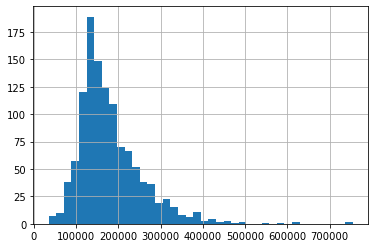

In [34]:
#histogram
df_train['SalePrice'].hist(bins = 40)

We can clearly see that the target variable has a normal ditribution that is skewed towards the left. Now let's calculate the Skewness and Kurtosis :

MOst houses have sale price in between 100000 to 200000. Very few houses have sale price of 600000 & 700000

In [35]:
#skewness & kurtosis
#print("Skewness: %f" % df_train['SalePrice'].skew())
#print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [36]:
#log transform the target 
#df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#histogram
#df_train['SalePrice'].hist(bins = 40)

In [37]:
#skewness & kurtosis
#print("Skewness: %f" % df_train['SalePrice'].skew())
#print("Kurtosis: %f" % df_train['SalePrice'].kurt())

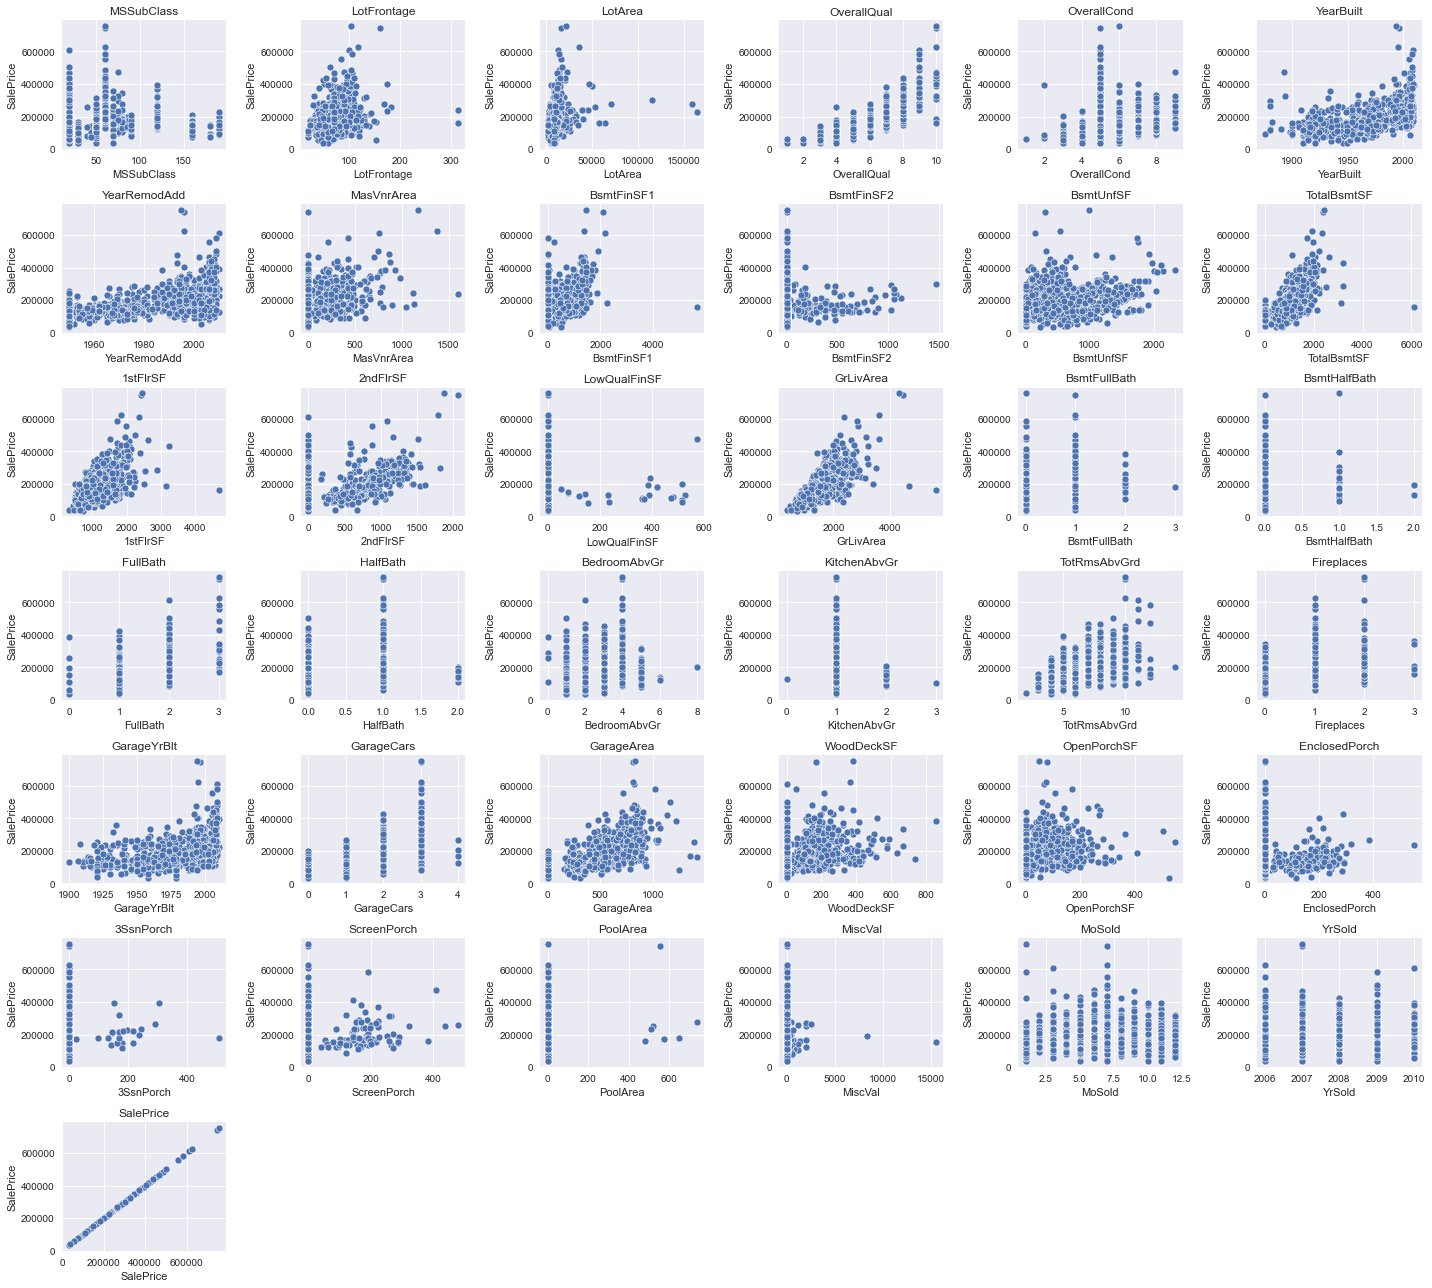

In [38]:
num_var = df_train.select_dtypes(exclude= ["O"]).columns
plt.style.use("seaborn")
fig, axs = plt.subplots(7, 6, figsize=(20,18))

for i in range(42):
  ax = axs[i//6, i%6]
  try:
    sns.scatterplot(x=df_train[num_var[i]], y=df_train['SalePrice'], ax=ax)
    ax.set_title(num_var.values[i])
  except:
    axs[-1,i%6].axis('off')
  
plt.tight_layout()
plt.show()

From the above plots we can see that

1.With LotFrontage there is increase in Price, but there may be outliers
2.With LotArea there is increase in Price, but there may be outliers
3.With OverallQual, OverallCond, YearBuilt, YearReMOdAdd,MassVnrArea,GrLivArea there is increase in Price, but there may be outliers
4. With TotRmsAbvGrd, GarageArea, FullBath,2ndFlrSF,1stFlrSF, TotalBsmtSF,BsmtUnfSF, BsmtFinSF1,MasVnrArea increase, prices increasing

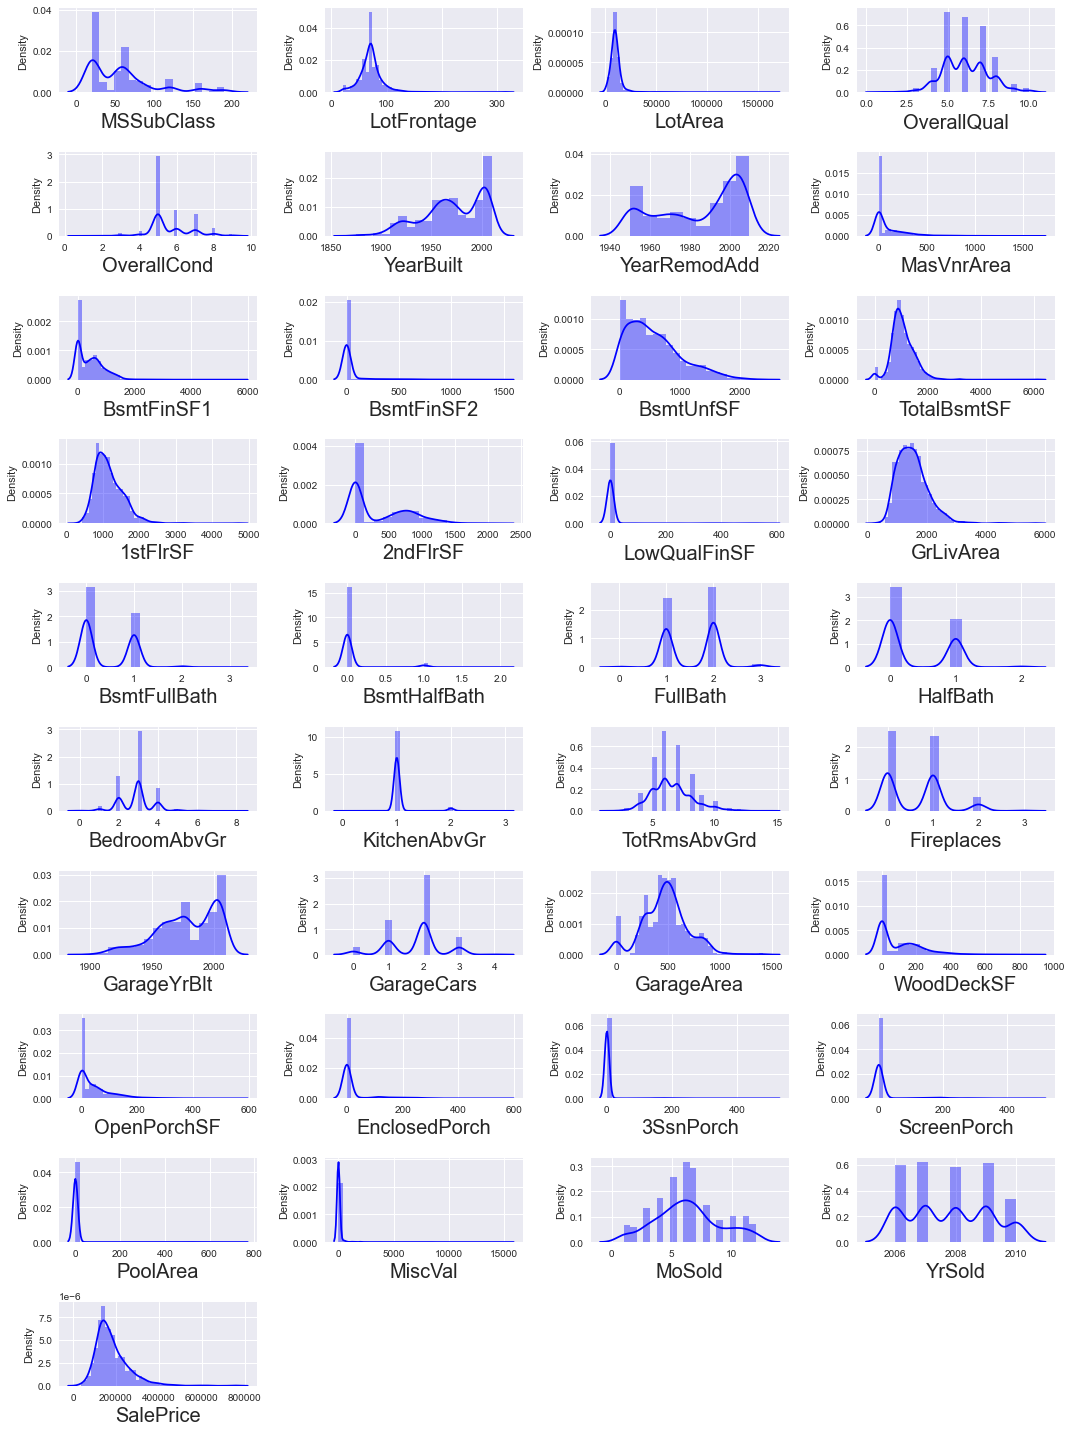

In [39]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in num_var:
    if plotnumber<=37:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df_train[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

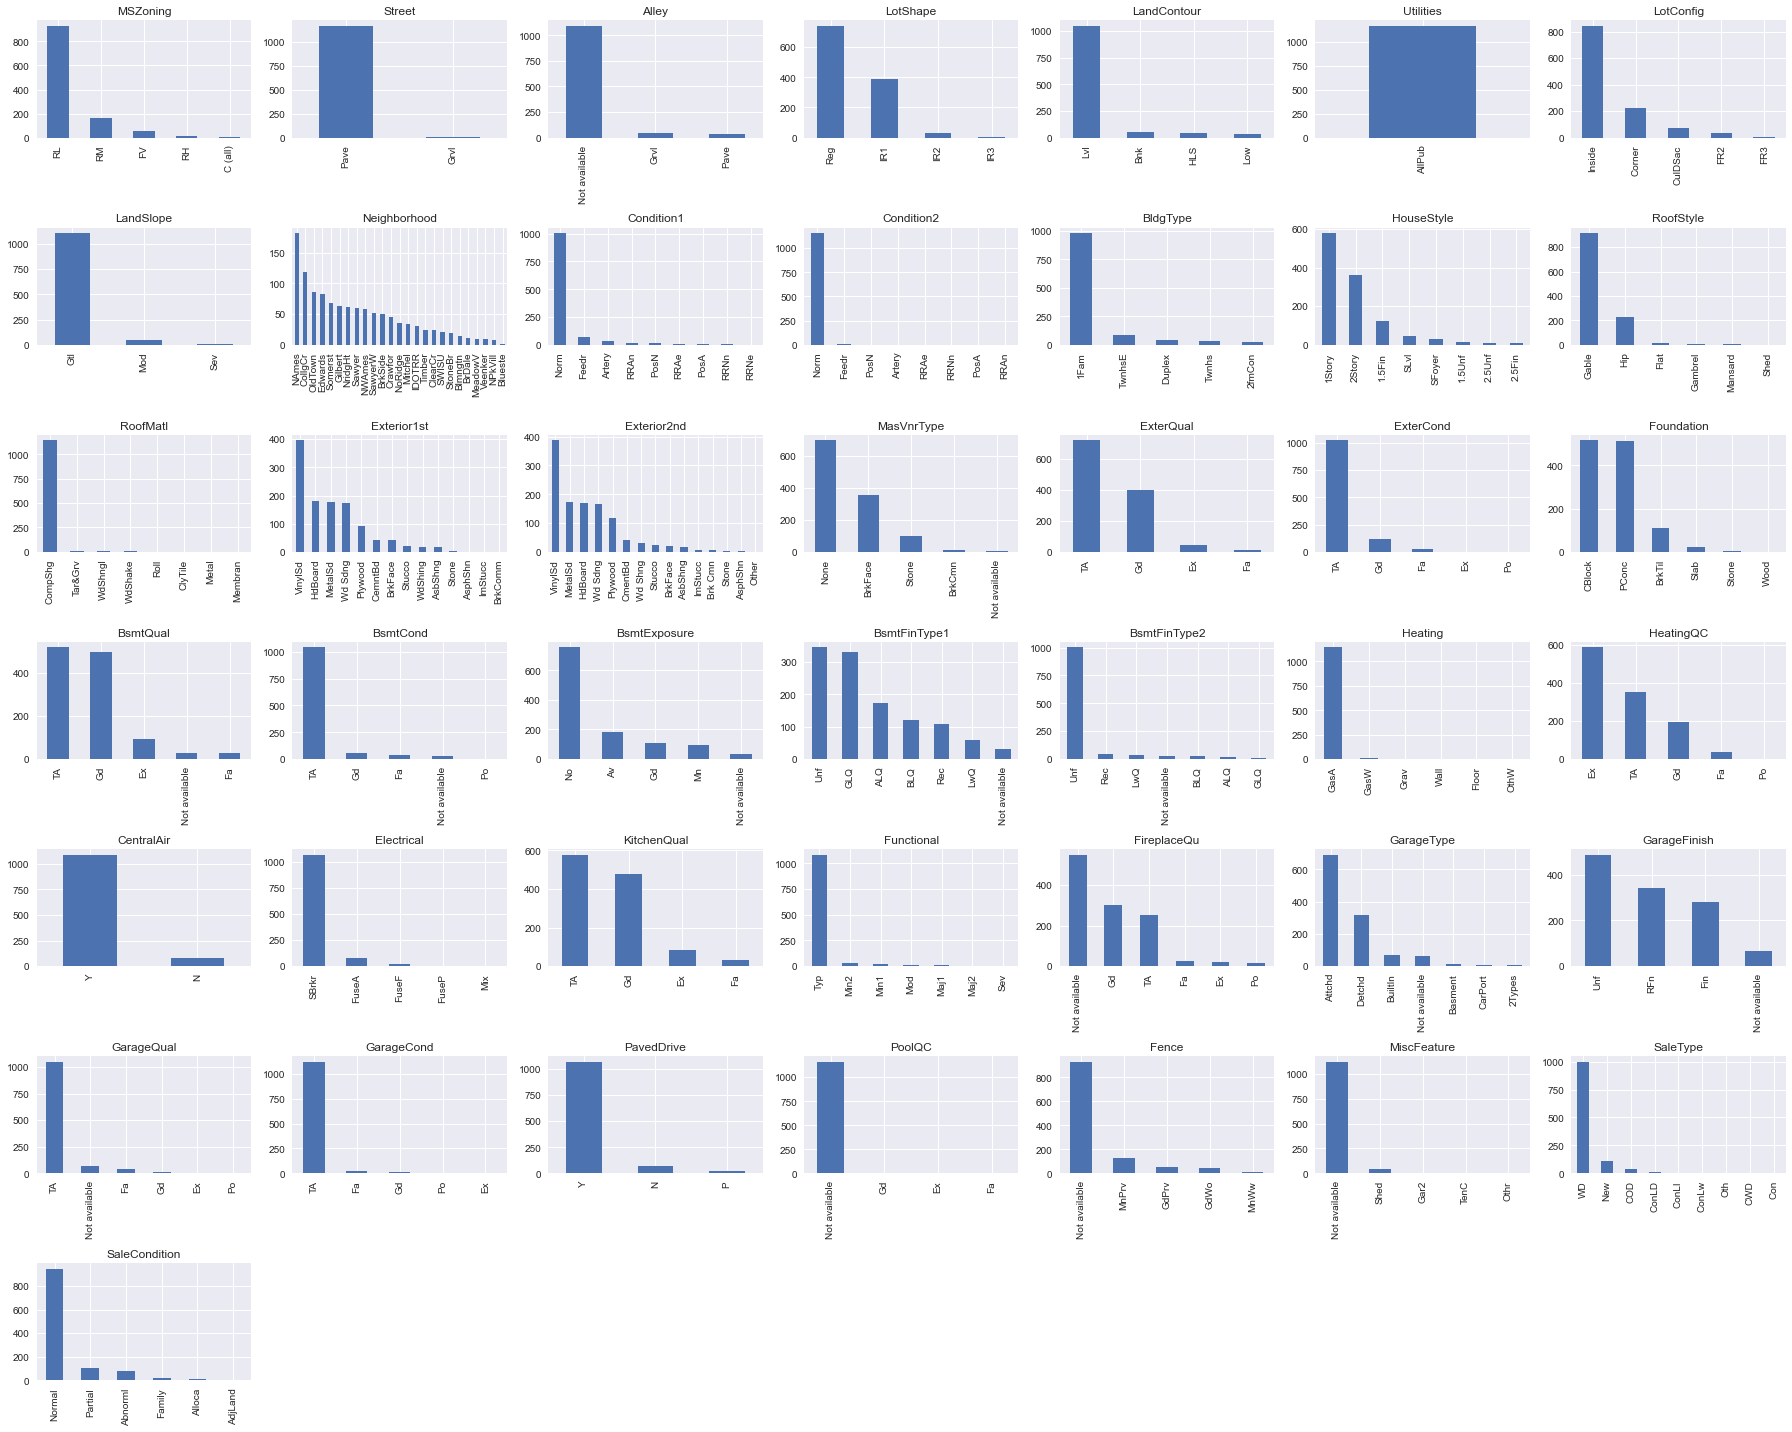

In [40]:
cat_var = df_train.select_dtypes(include= ["object"]).columns

#Bar plots for unique vlues in the categorical columns and their counts
plt.style.use("seaborn")
fig, axs = plt.subplots(7, 7, figsize=(25,20))

for i in range(49):
  ax = axs[i//7, i%7]
  try:
    df_train[cat_var.values[i]].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(cat_var.values[i])
  except:
    axs[-1,i%7].axis('off')

plt.tight_layout()
plt.show()

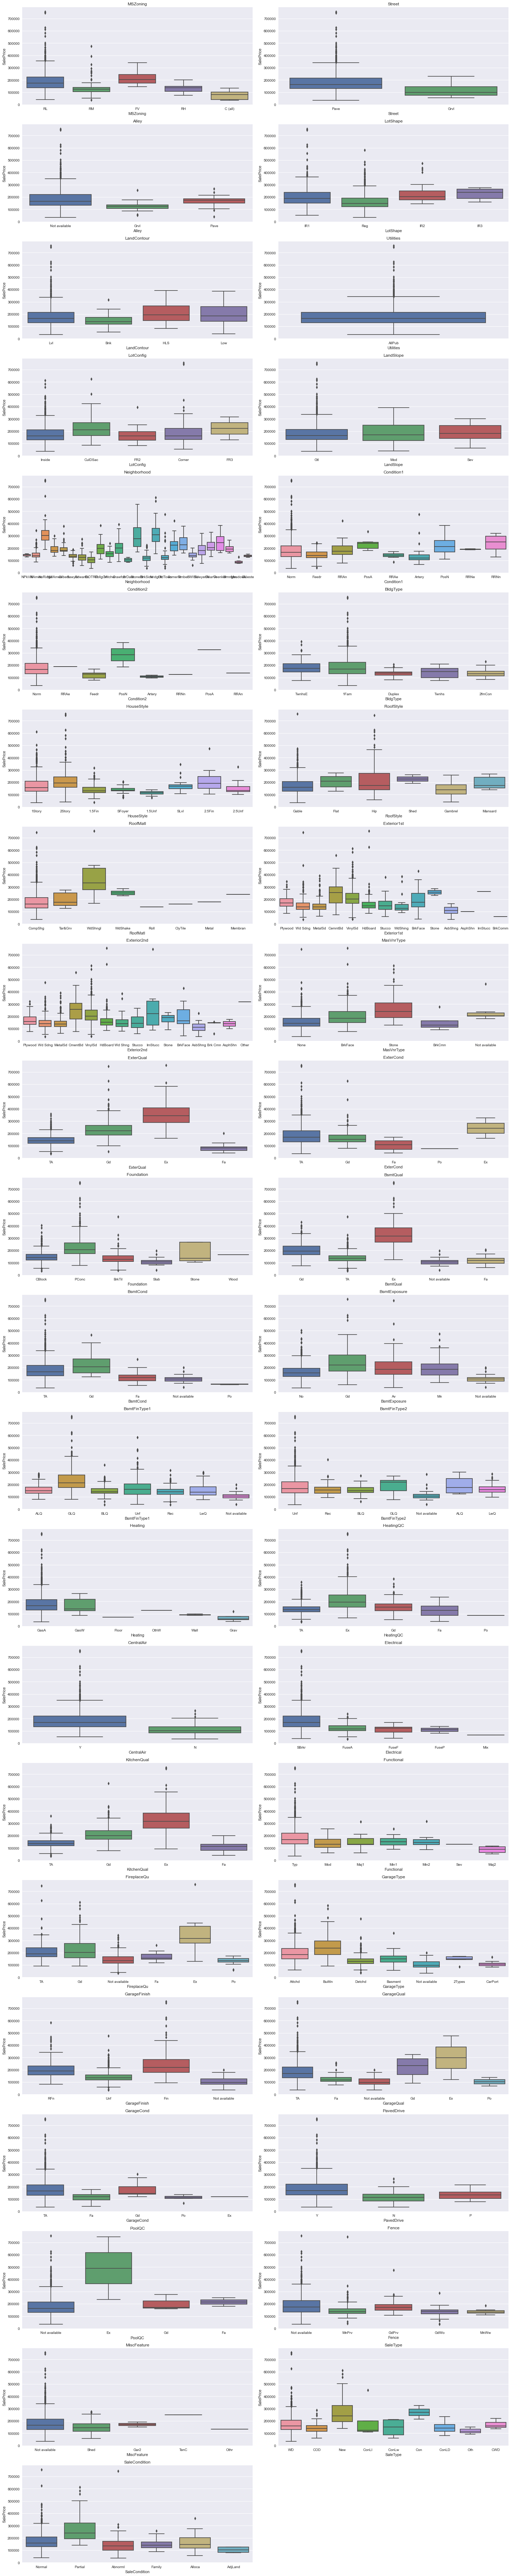

In [41]:
#checking different columns relations with sale price using box plots
plt.style.use("seaborn")
fig, axs = plt.subplots(22, 2, figsize=(20,100))

for i in range(44):
  ax = axs[i//2, i%2]
  try:
    sns.boxplot(x=df_train[cat_var.values[i]], y=df_train['SalePrice'], ax=ax)
    ax.set_title(cat_var.values[i])
  except:
    axs[-1,i%2].axis('off')

plt.tight_layout()
plt.show()

Checking some of the Scatter plots above

<AxesSubplot:title={'center':'comparison between YearBuilt and SalePrice'}, xlabel='YearBuilt', ylabel='SalePrice'>

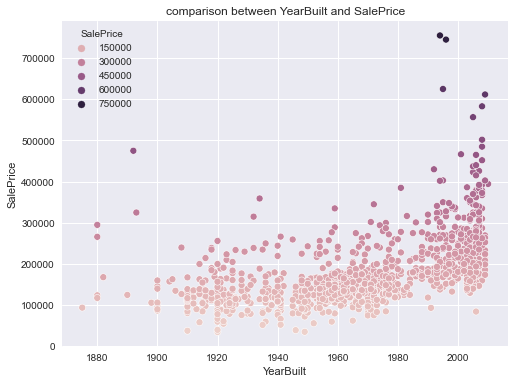

In [42]:
plt.figure(figsize=[8,6])
plt.title("comparison between YearBuilt and SalePrice")
sns.scatterplot(df_train['YearBuilt'],df_train['SalePrice'],hue=df_train["SalePrice"])

House price increased along with the year built. Newer ones got high pricing

<AxesSubplot:title={'center':'comparison between OverallQual and SalePrice'}, xlabel='OverallQual', ylabel='SalePrice'>

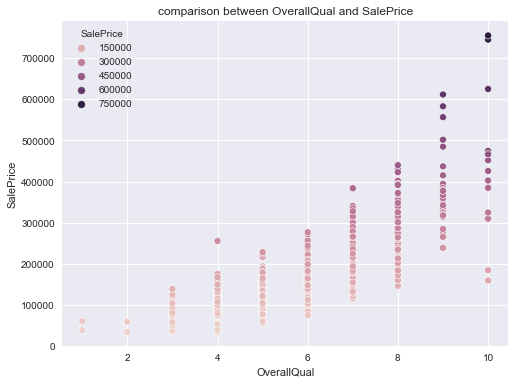

In [43]:
plt.figure(figsize=[8,6])
plt.title("comparison between OverallQual and SalePrice")
sns.scatterplot(df_train['OverallQual'],df_train['SalePrice'],hue=df_train["SalePrice"])

With the overall Quality increase the price is also increased

<AxesSubplot:title={'center':'comparison between GrLivArea and SalePrice'}, xlabel='GrLivArea', ylabel='SalePrice'>

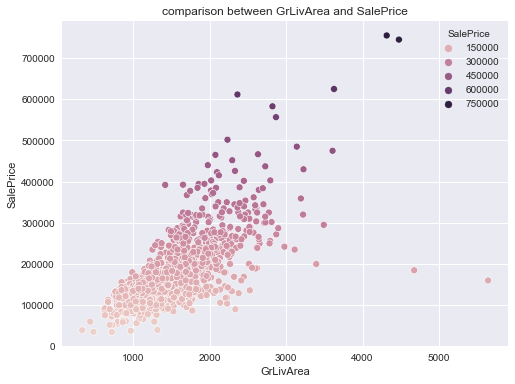

In [44]:
plt.figure(figsize=[8,6])
plt.title("comparison between GrLivArea and SalePrice")
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'],hue=df_train["SalePrice"])

With increase in living area price is also increased

<AxesSubplot:title={'center':'comparison between GarageArea and SalePrice'}, xlabel='GarageArea', ylabel='SalePrice'>

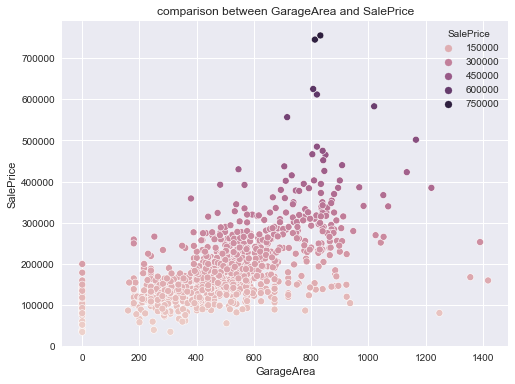

In [45]:
plt.figure(figsize=[8,6])
plt.title("comparison between GarageArea and SalePrice")
sns.scatterplot(df_train['GarageArea'],df_train['SalePrice'],hue=df_train["SalePrice"])

With increase in GARAGE aREA price of the house increased

<AxesSubplot:title={'center':'comparison between MSSubClass and SalePrice'}, xlabel='MSSubClass', ylabel='SalePrice'>

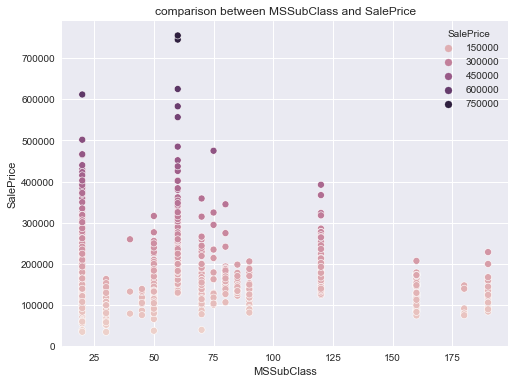

In [46]:
plt.figure(figsize=[8,6])
plt.title("comparison between MSSubClass and SalePrice")
sns.scatterplot(df_train['MSSubClass'],df_train['SalePrice'],hue=df_train["SalePrice"])

<AxesSubplot:title={'center':'comparison between LotFrontage and SalePrice'}, xlabel='LotFrontage', ylabel='SalePrice'>

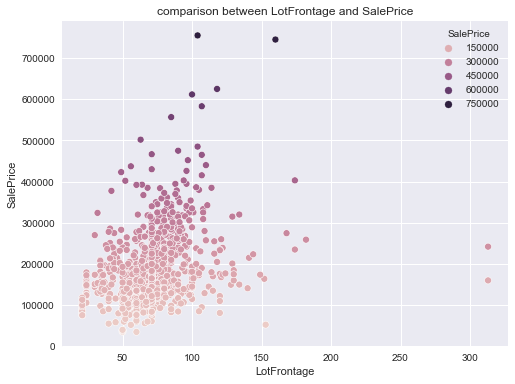

In [47]:
plt.figure(figsize=[8,6])
plt.title("comparison between LotFrontage and SalePrice")
sns.scatterplot(df_train['LotFrontage'],df_train['SalePrice'],hue=df_train["SalePrice"])

<AxesSubplot:title={'center':'comparison between LotArea and SalePrice'}, xlabel='LotArea', ylabel='SalePrice'>

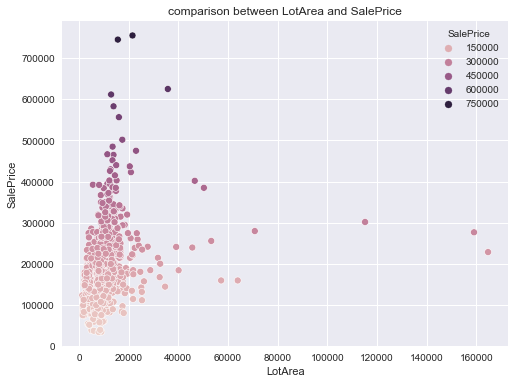

In [48]:
plt.figure(figsize=[8,6])
plt.title("comparison between LotArea and SalePrice")
sns.scatterplot(df_train['LotArea'],df_train['SalePrice'],hue=df_train["SalePrice"])

# Checking the Correlation

In [49]:
df_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336681 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336681     1.000000  0.299452     0.229218    -0.047573   
LotArea         -0.124151     0.299452  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229218  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047573  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.112655  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.088799  0.027228     0.555945     0.080669   
MasVnrArea       0.027813     0.188758  0.121086     0.407230    -0.137475   
BsmtFinSF1      -0.052236     0.228996  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002159  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.113924  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356107  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.403436  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089675  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007506 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374251  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.094046  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001389  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171773  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047816  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.237199  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002729 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318771  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.230610  0.285983     0.390067    -0.013632   
GarageYrBlt      0.073130     0.055992 -0.034765     0.511482    -0.301881   
GarageCars      -0.027639     0.260252  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322644  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.088334  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151328  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.020902 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.051084  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030405  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.196001  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.001329  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022517  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.003885 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323779  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027813   -0.052236   -0.062403   
LotFrontage     0.112655      0.088799    0.188758    0.228996    0.002159   
LotArea         0.005506      0.027228    0.121086    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.407230    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137475   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.321905    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181385    0.114430   -0.044694   
MasVnrArea      0.321905      0.181385    1.000000    0.265735   -0.065707   
BsmtFinSF1      0.227933      0.114430    0.265735    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065707   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109562   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.365016    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

<AxesSubplot:>

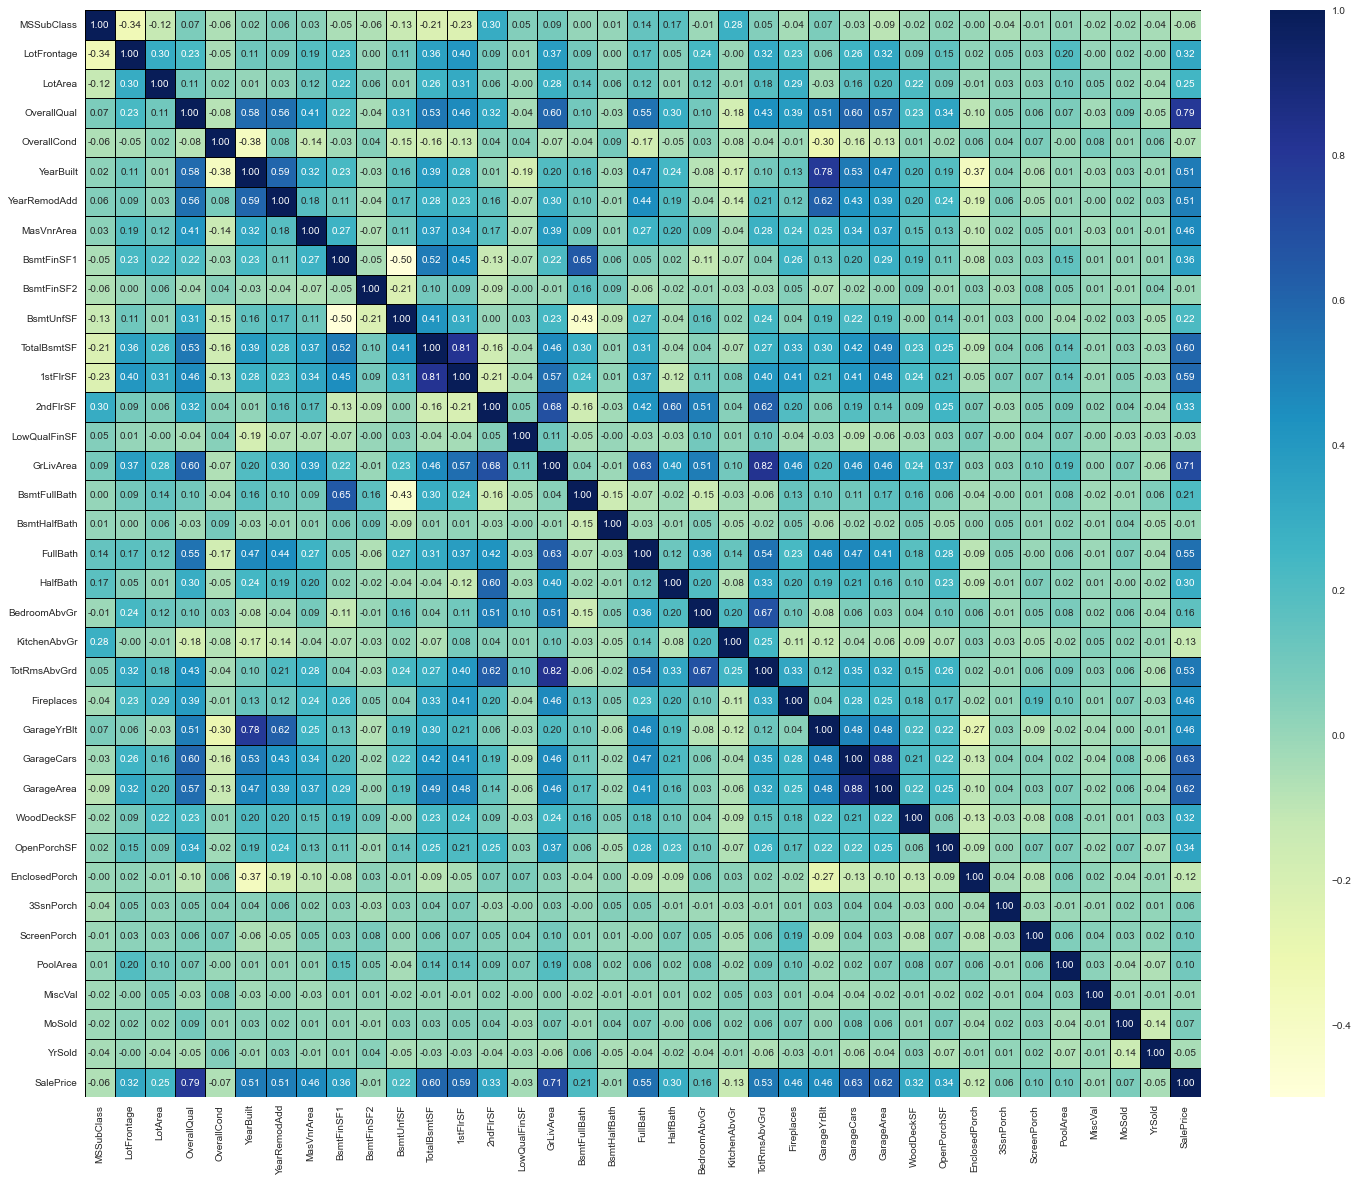

In [50]:
# For Train Data
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

From the above heatmap we can clearly see that OverallQual,,YearBuilt,YearREmodAdd,TotalBsmtSF,1stFlrSF,GrLivARea,FullBath,TotRmsAbvGrd,FirePlaces,
GarageyrBilt,GarageCars,GarageARea are highly positive correlated with the SalePrice

In [51]:
#The Top 10 Columns with Asceding order in correlation with SalePrice
cols = df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

# Data preprocessing

In [52]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice'].values

In [53]:
# Handle Outliers

new_num_var = X.select_dtypes(exclude='O').columns.values
new_num_var

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [54]:
# check are there any negative number
(X[new_num_var] < 0).sum().sum()

0

Checking Outliers with Boxplots

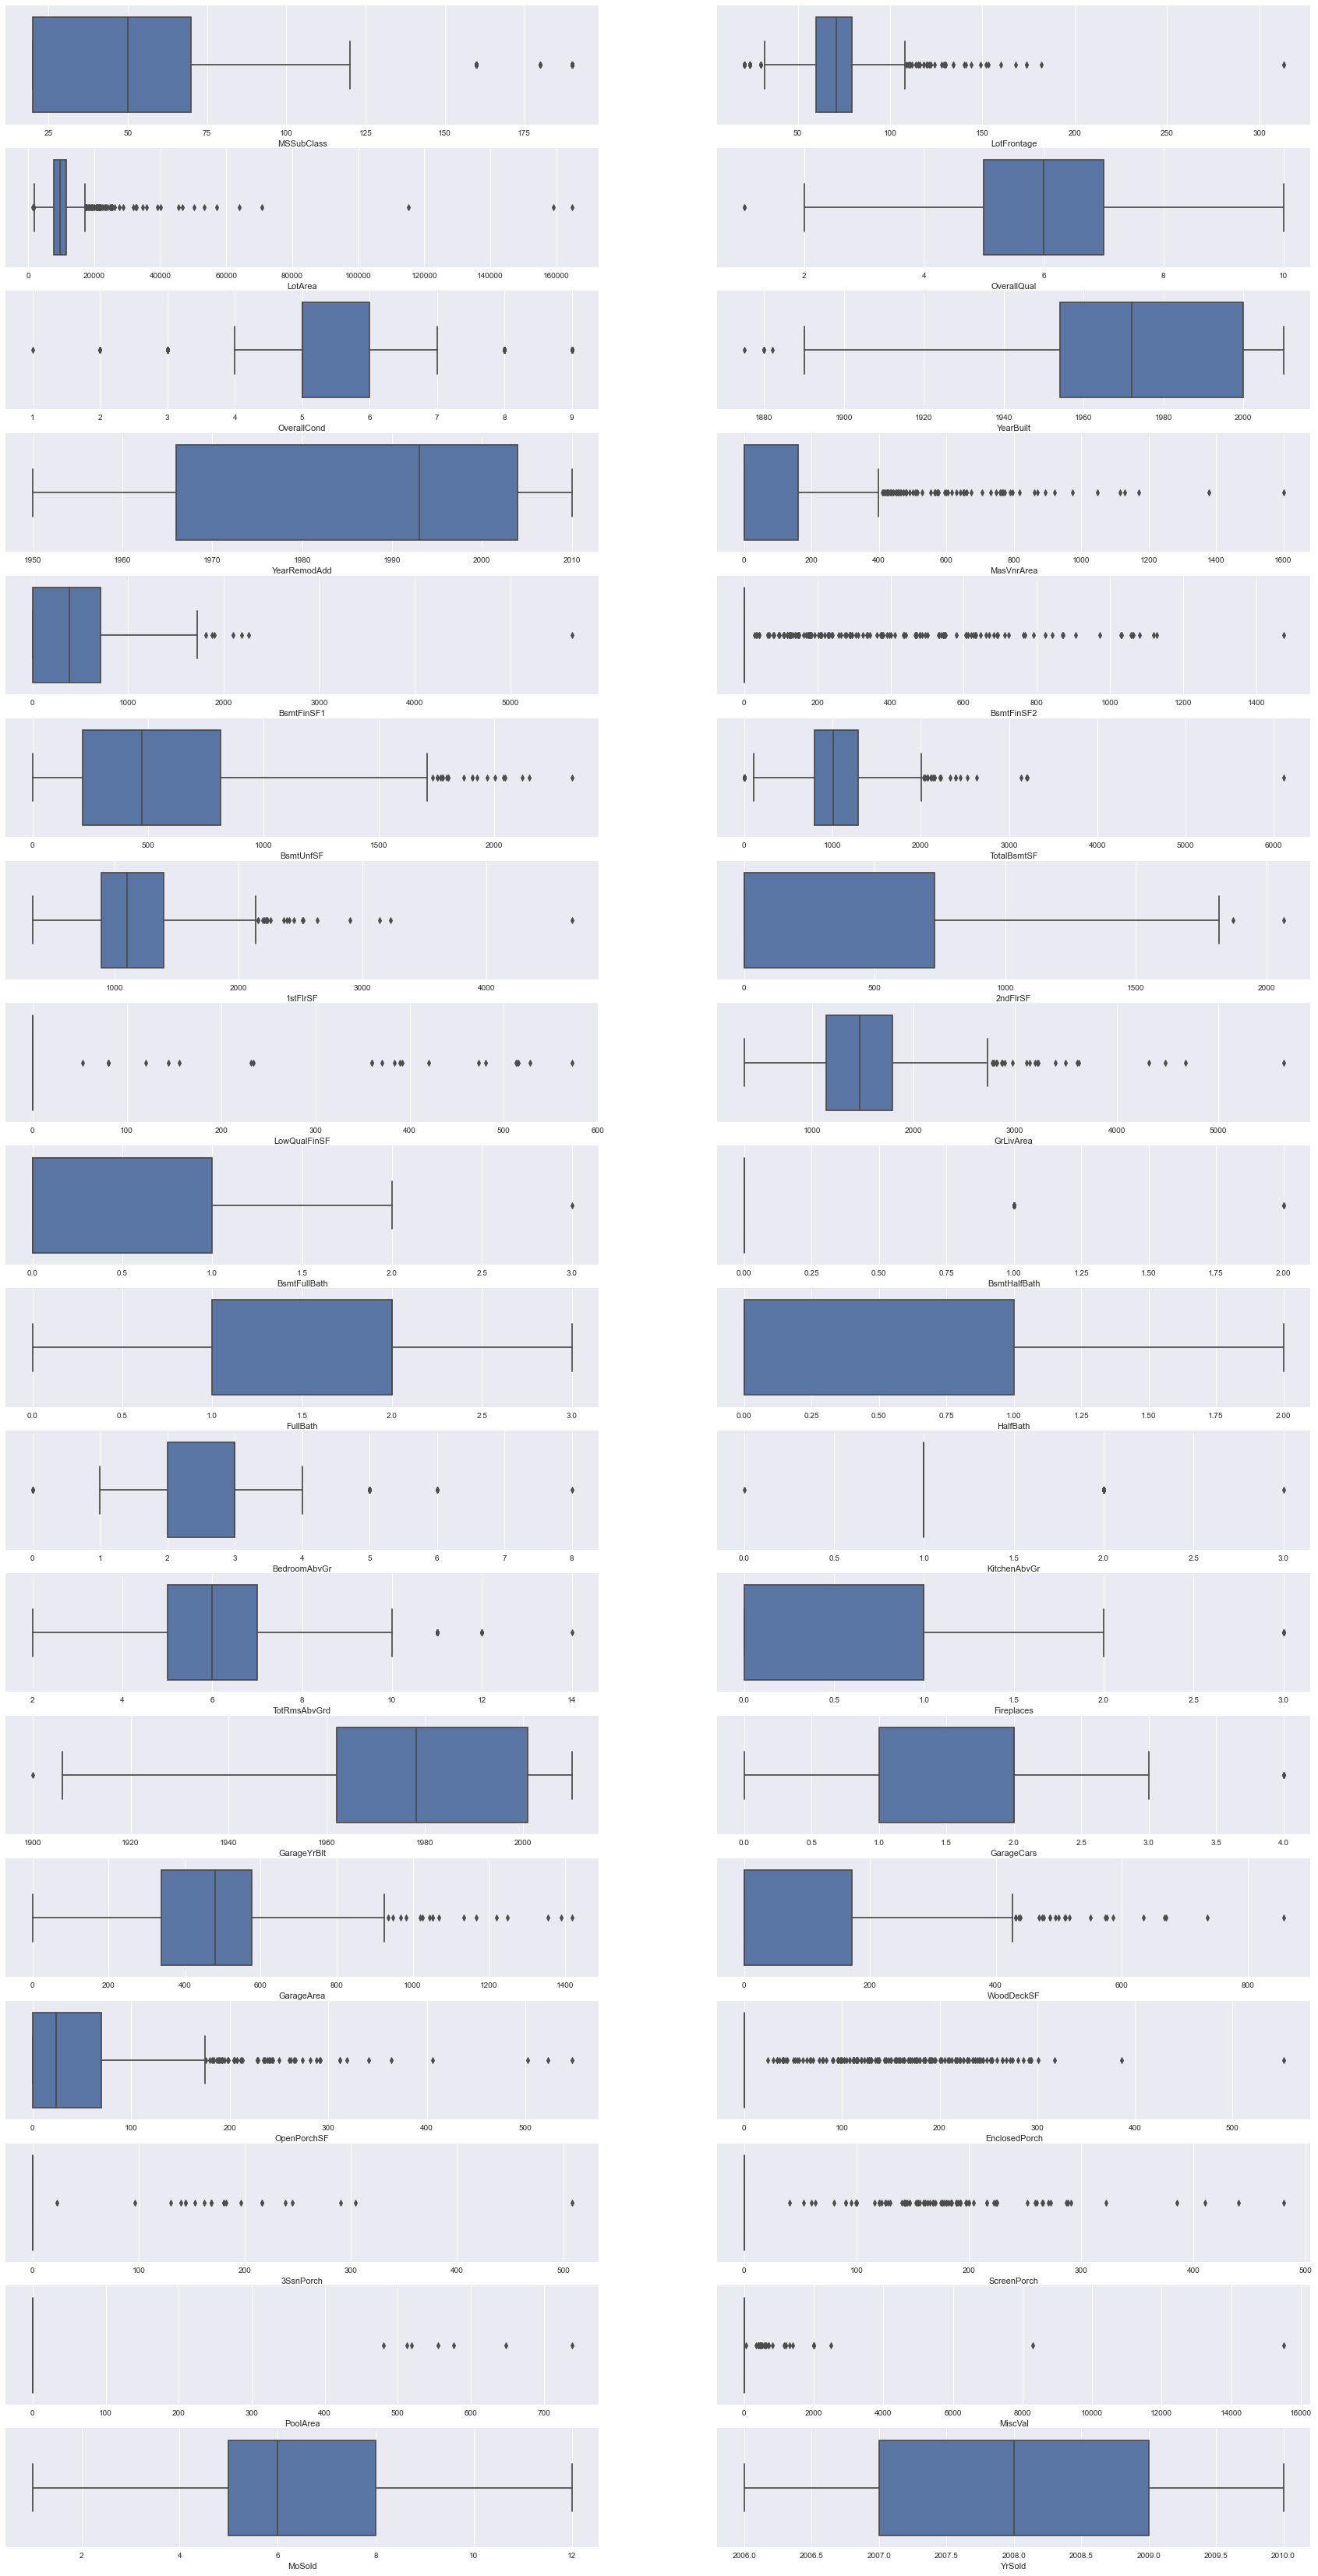

In [55]:
plt.figure(figsize=(30,60))
for i in enumerate(X[new_num_var]):
    plt.subplot(18,2,i[0]+1)
    sns.boxplot(X[new_num_var][i[1]])

The above b oxplots shows that there are outliers in many columns

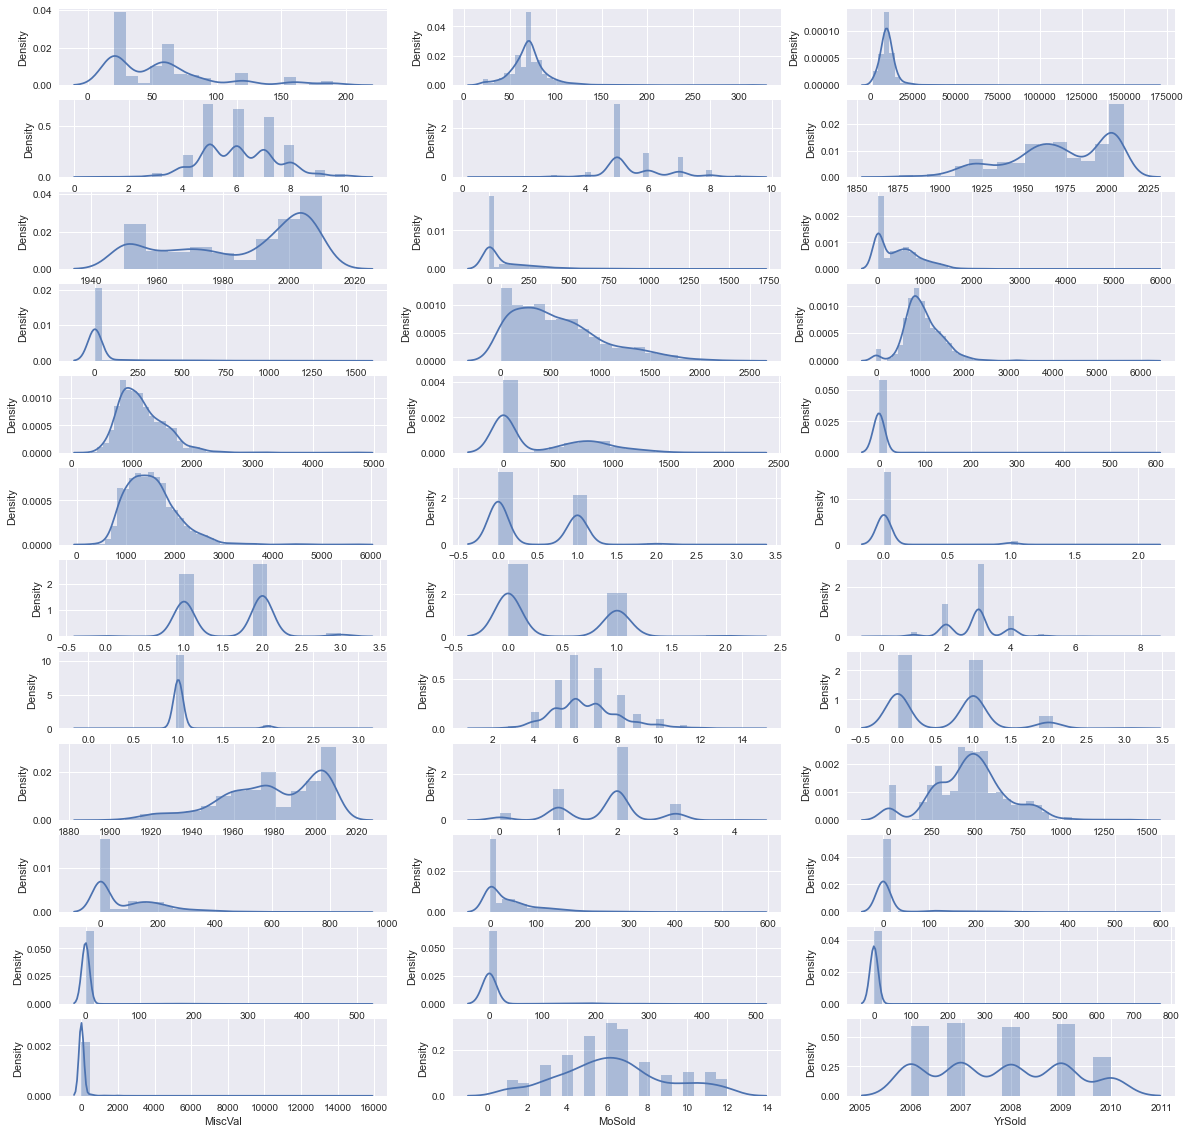

In [56]:
#to check the distribution of the data of each column

plt.figure(figsize=(20,20))
for i in enumerate(X[new_num_var]):
    #plt.figure(figsize=(12,10))
    plt.subplot(12,3,i[0]+1)
    sns.distplot(X[new_num_var][i[1]])

Now we have to remove the outliers for removing the skewness from the dataset

In [57]:
X[new_num_var].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
dtype: float64

# ZSCORE METHOD

In [58]:
from scipy.stats import zscore

# to get the zscore
z=np.abs(zscore(X[new_num_var]))

In [59]:
z

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
0       1.508301     0.000000   0.620616     0.075169     0.530217   0.168236   
1       0.877042     1.070631   0.600903     1.364138     0.359572   0.030885   
2       0.077095     0.936867   0.063075     0.644484     0.530217   0.831975   
3       0.877042     1.516514   0.141424     0.075169     0.359572   0.201423   
4       0.877042     0.000000   0.686902     0.075169     1.249361   0.201423   
5       0.077095     0.579133   0.398638     0.644484     0.530217   1.163844   
6       0.877042     0.000000   0.095632     0.794823     0.359572   0.462315   
7       0.877042     0.758514   0.294881     0.794823     1.420006   0.462315   
8       0.877042     0.044074   0.146840     0.794823     1.249361   0.196820   
9       0.161440     0.401808   0.223904     0.794823     0.530217   0.794185   
10      0.161440     0.935838   0.210502     0.075169     0.359572   1.126054   
11      0.077095     1.203368   0.104623     0.644484     0.359572   1.064283   
12      0.877042     2.586631   0.143936     0.644484     0.530217   1.064283   
13      0.877042     0.401808   0.177889     0.794823     0.530217   0.362755   
14      0.161440     0.534545   0.668027     0.794823     1.249361   0.528689   
15      0.315629     0.712897   0.011979     0.075169     1.249361   1.590671   
16      0.638508     0.000000   0.513173     0.075169     2.139151   1.358362   
17      0.877042     0.311603   0.354131     0.644484     0.530217   1.197031   
18      0.877042     0.000000   0.286784     0.075169     1.249361   0.168236   
19      2.462438     2.095132   0.945848     0.794823     0.530217   0.030885   
20      0.077095     0.401808   0.217817     0.644484     0.530217   0.997909   
21      0.673431     0.044074   0.227813     0.794823     1.249361   0.035488   
22      0.877042     0.133251   0.085747     0.794823     0.359572   0.694624   
23      0.877042     0.000000   0.019462     0.794823     0.359572   0.329568   
24      0.877042     0.000514   0.140139     0.794823     2.139151   0.196820   
25      0.877042     0.000000   1.174415     0.075169     0.530217   0.595063   
26      0.638508     0.000000   1.659024     0.794823     1.249361   1.756606   
27      0.877042     0.758514   0.101551     2.083791     3.199584   1.296592   
28      0.280707     0.579133   0.458446     0.794823     0.359572   1.623858   
29      0.315629     0.134279   0.167893     0.075169     1.249361   1.225615   
30      1.508301     0.445368   0.315711     2.083791     0.530217   1.130657   
31      0.077095     0.489956   0.793730     0.644484     2.139151   0.827372   
32      0.792698     0.000000   0.938756     0.794823     0.530217   0.201423   
33      0.161440     0.000000   0.209217     0.794823     0.359572   0.993306   
34      0.077095     0.000000   0.477713     0.794823     0.359572   0.760998   
35      0.877042     2.185337   0.014380     0.794823     0.359572   0.135049   
36      0.877042     0.401808   0.009465     0.644484     0.530217   0.168236   
37      0.877042     0.580161   0.237921     0.075169     1.249361   0.694624   
38      0.673431     0.000000   0.328890     0.075169     0.359572   0.234610   
39      0.399974     0.935838   0.154658     0.794823     0.359572   1.358362   
40      0.877042     3.121689   2.377282     0.075169     0.530217   0.362755   
41      0.877042     0.044074   0.314426     0.794823     1.249361   0.495502   
42      2.462438     1.827603   0.815844     0.644484     0.530217   1.130657   
43      2.462438     2.095132   0.889334     0.075169     0.530217   1.097470   
44      0.554163     0.267015   0.234514     0.794823     2.139151   0.201423   
45      0.877042     0.223455   0.242444     0.794823     1.249361   0.367358   
46      0.077095     0.489956   0.263776     0.075169     0.530217   0.964722   
47      0.877042     1.293572   0.169234     0.794823     1.249361   0.760998   
48      0.877042     0.935838   0.612

In [60]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    4,    7,   14,   20,   22,   23,   25,   27,   32,
         32,   32,   32,   33,   38,   40,   47,   48,   51,   51,   63,
         64,   66,   66,   68,   68,   72,   72,   73,   74,   76,   77,
         91,   93,   93,   94,   95,   96,   97,   98,   98,  103,  103,
        103,  103,  103,  103,  106,  106,  107,  112,  113,  115,  119,
        119,  119,  119,  120,  127,  127,  133,  133,  138,  138,  140,
        141,  141,  141,  141,  141,  141,  141,  142,  142,  143,  146,
        150,  151,  152,  153,  156,  156,  157,  162,  164,  166,  170,
        178,  178,  184,  187,  191,  192,  192,  192,  192,  195,  196,
        196,  205,  206,  210,  210,  211,  211,  212,  214,  216,  219,
        226,  228,  232,  232,  232,  237,  241,  241,  241,  243,  245,
        245,  253,  254,  255,  257,  259,  269,  272,  273,  284,  284,
        289,  290,  299,  299,  301,  303,  304,  305,  305,  305,  305,
        305,  308,  309,  310,  310,  312,  313,  

In [61]:
#Removing the outliers data
df1=X[new_num_var][(z<3).all(axis=1)]

In [62]:
df1.shape

(807, 36)

In [63]:
X[new_num_var].shape

(1168, 36)

In [64]:
#Data Loss
print("Data Loss in Zscore method is: ",(1168-807)*100/1168,"%")

Data Loss in Zscore method is:  30.90753424657534 %


# IQR METHOD

In [65]:
from scipy import stats
IQR = stats.iqr(X[new_num_var])
IQR

668.0

In [66]:
Q1 = X[new_num_var].quantile(0.25)
Q3 =  X[new_num_var].quantile(0.75)

In [67]:
df2 = X[new_num_var][~((X[new_num_var] < (Q1 - 1.5 * IQR)) | (X[new_num_var] > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(740, 36)

In [68]:
X[new_num_var].shape

(1168, 36)

Data Loss In IQR Method

In [69]:
#Data Loss
print("Data Loss in Zscore method is: ",(1168-740)*100/1168,"%")

Data Loss in Zscore method is:  36.64383561643836 %


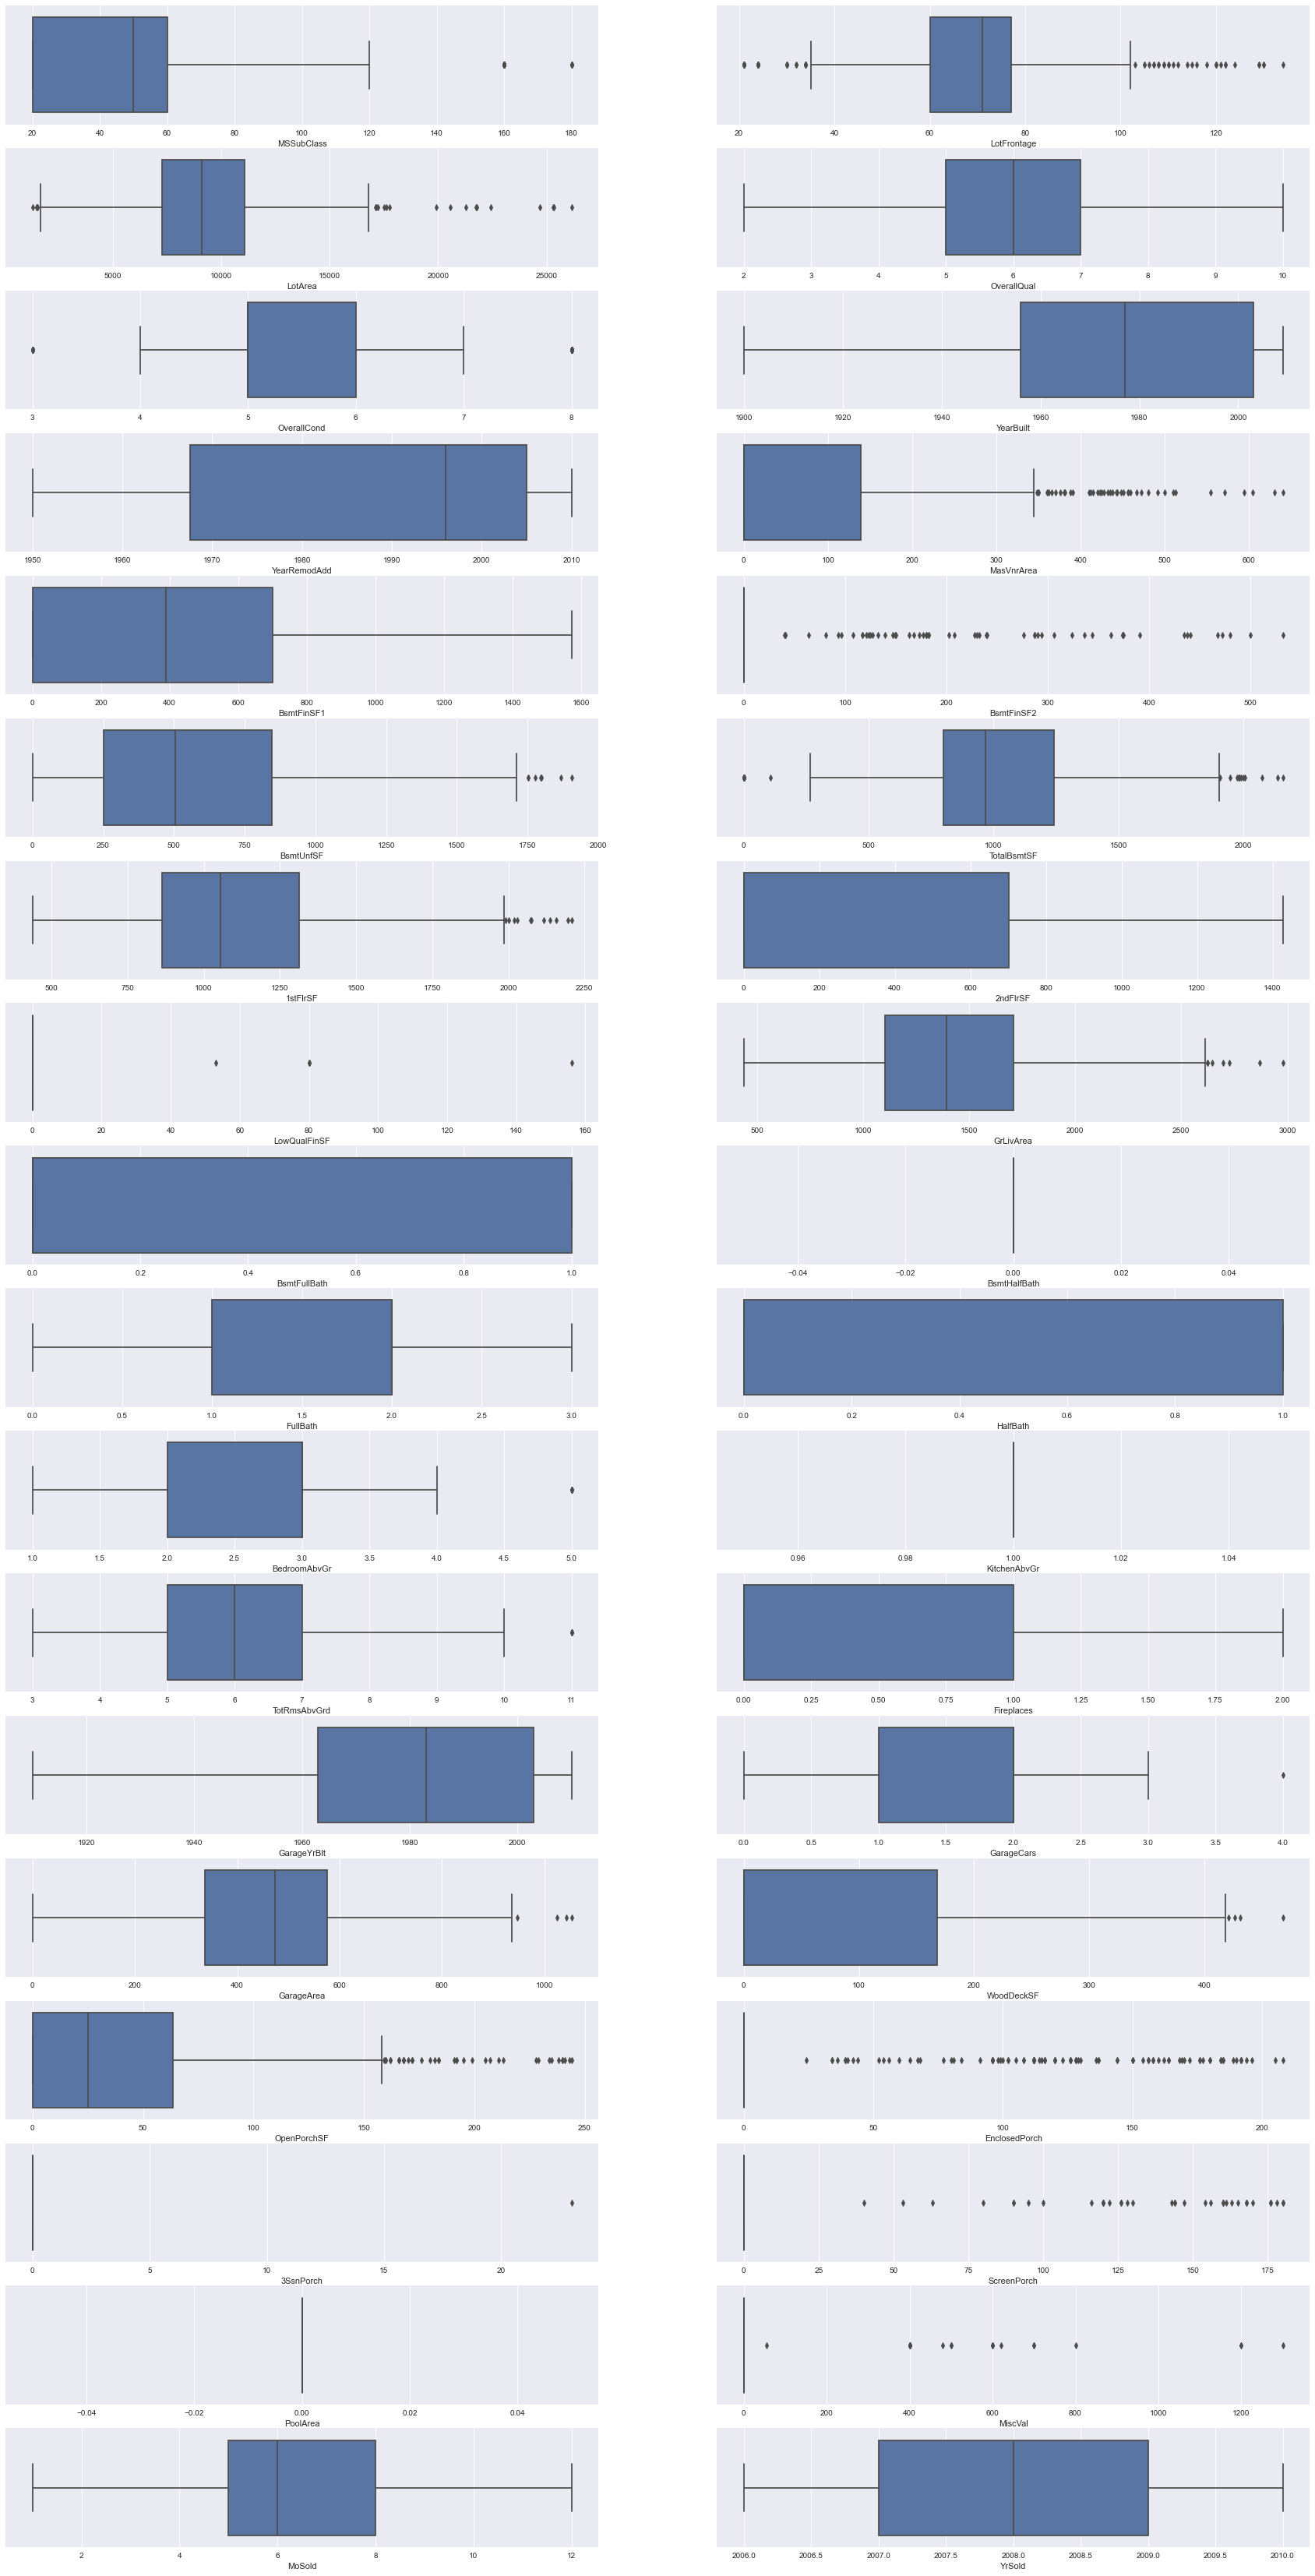

In [70]:
plt.figure(figsize=(30,60))
for i in enumerate(df1):
    plt.subplot(18,2,i[0]+1)
    sns.boxplot(df1[i[1]])

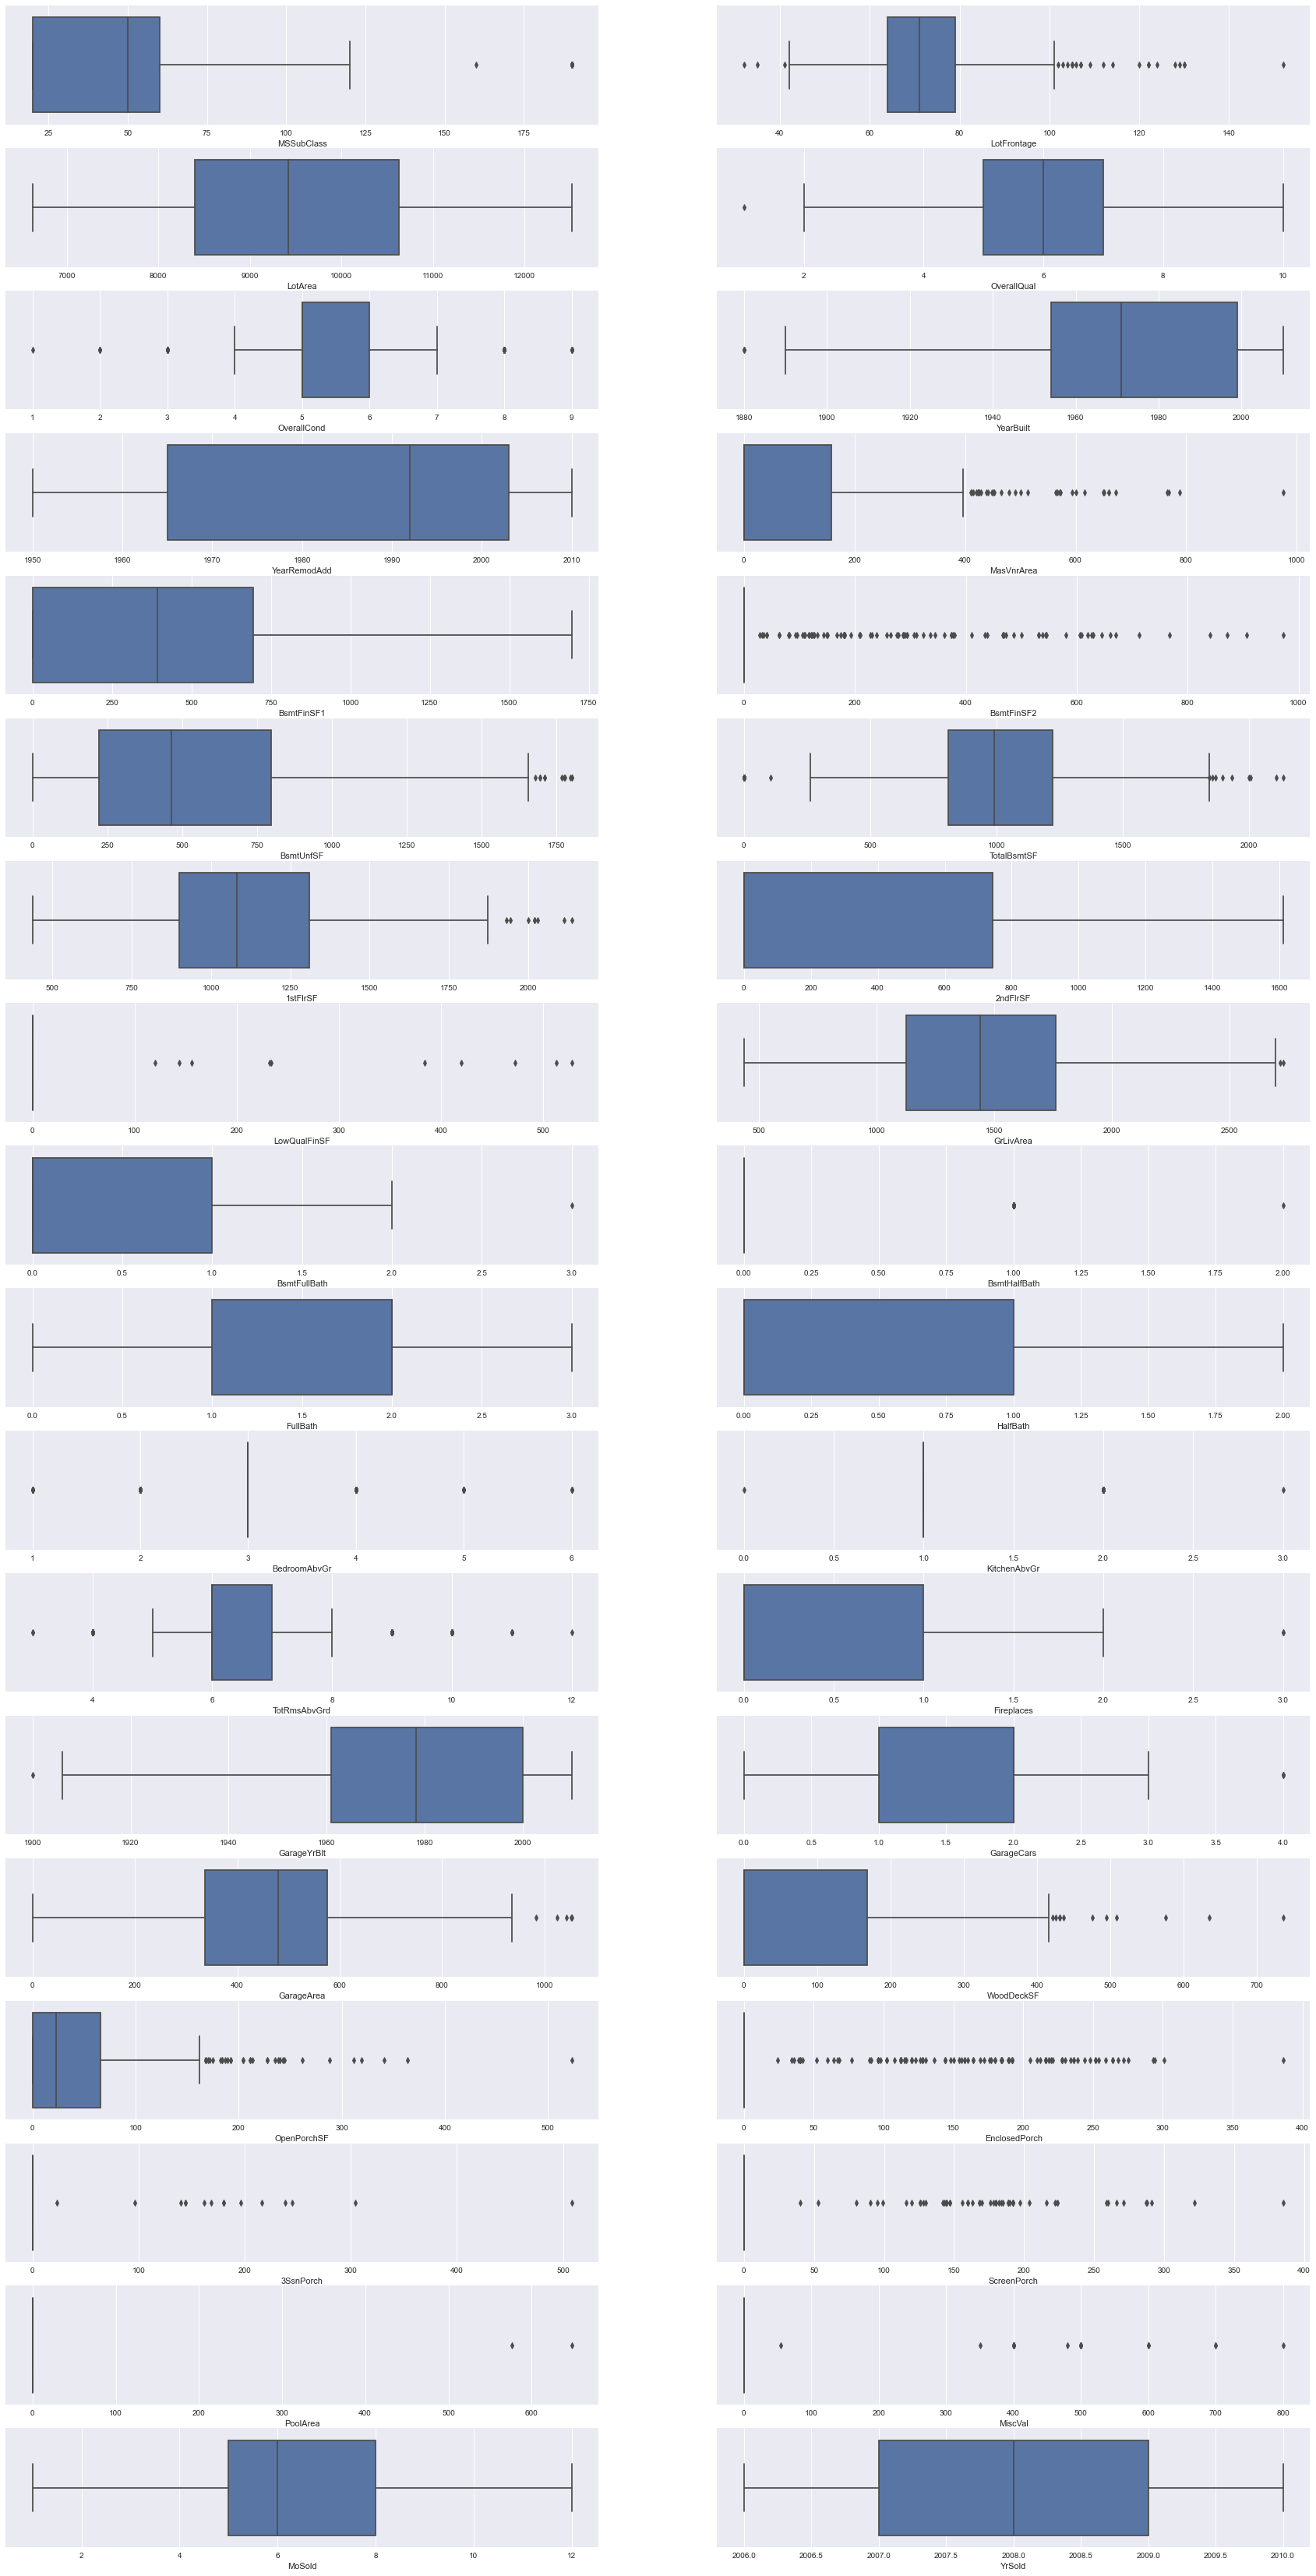

In [71]:
plt.figure(figsize=(30,60))
for i in enumerate(df2):
    plt.subplot(18,2,i[0]+1)
    sns.boxplot(df2[i[1]])

In [72]:
def removeOutliers(new_num_var):
    global df_train
    for i in range(len(new_num_var)):
        q1 = df_train[new_num_var[i]].quantile(0.25)
        q3 = df_train[new_num_var[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df_train.loc[(df_train[new_num_var[i]] <= minimum), new_num_var[i]] = minimum
        df_train.loc[(df_train[new_num_var[i]] >= maximum), new_num_var[i]] = maximum  

In [73]:
removeOutliers(new_num_var)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


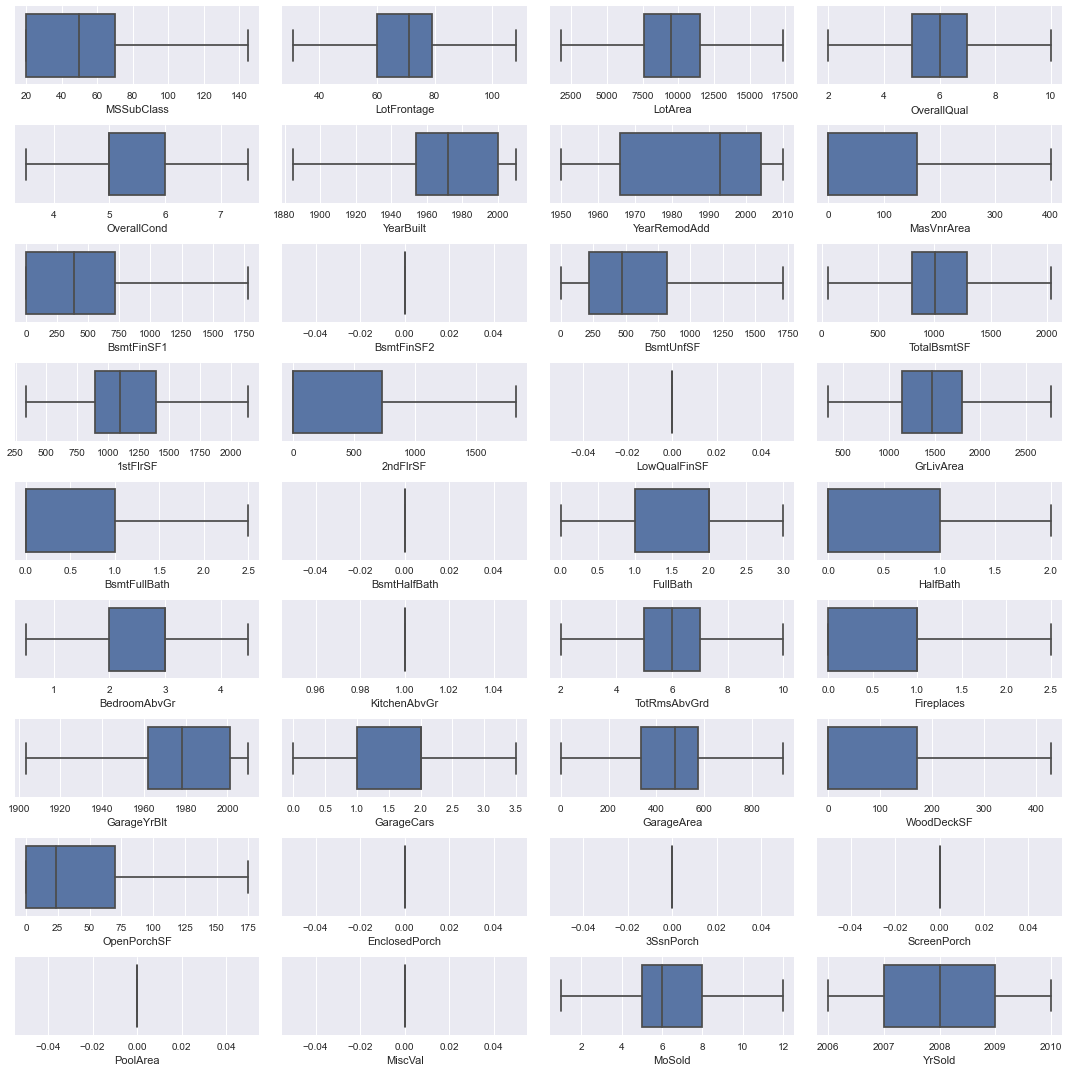

In [74]:
n_rows = 9
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df_train[new_num_var[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.tight_layout()
plt.show()

# Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#For train data
df_train=df_train.apply(LabelEncoder().fit_transform)
print('For train data')
print(df_train.head())
print('\n\n')
#For test data
df_test_le=df_test.apply(LabelEncoder().fit_transform)
print('For test data')
print(df_test_le.head())

For train data
   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          11         3           39       76       1      1         0   
1           0         3           64      804       1      1         0   
2           5         3           61      445       1      1         0   
3           0         3           74      628       1      1         0   
4           0         3           39      817       1      1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       3      4   
1            3          0          4  ...         0       3      4   
2            3          0          1  ...         0       3      4   
3            3          0          4  ...         0       3      2   
4            3          0          2  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       1       1  

In [76]:
# Checking the data type of each columns

print('Train data')
print(df_train.info())
print("\n")
print('Test data')
print(df_test_le.info())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1168 non-null   int64
 1   MSZoning       1168 non-null   int32
 2   LotFrontage    1168 non-null   int64
 3   LotArea        1168 non-null   int64
 4   Street         1168 non-null   int32
 5   Alley          1168 non-null   int32
 6   LotShape       1168 non-null   int32
 7   LandContour    1168 non-null   int32
 8   Utilities      1168 non-null   int32
 9   LotConfig      1168 non-null   int32
 10  LandSlope      1168 non-null   int32
 11  Neighborhood   1168 non-null   int32
 12  Condition1     1168 non-null   int32
 13  Condition2     1168 non-null   int32
 14  BldgType       1168 non-null   int32
 15  HouseStyle     1168 non-null   int32
 16  OverallQual    1168 non-null   int64
 17  OverallCond    1168 non-null   int64
 18  YearBuilt      1168 non-null   int64


All the data encoded to numerical values

# DAta Scaling

In [77]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice'].values

In [78]:
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          11         3           39       76       1      1         0   
1           0         3           64      804       1      1         0   
2           5         3           61      445       1      1         0   
3           0         3           74      628       1      1         0   
4           0         3           39      817       1      1         0   

   LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0            3          0          4  ...            0         0       3   
1            3          0          4  ...            0         0       3   
2            3          0          1  ...            0         0       3   
3            3          0          4  ...            0         0       3   
4            3          0          2  ...            0         0       3   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0      4            1        0       1       1         8              4  
1      4            1        0       9       1         8              4  
2      4            1        0       5       1         8              4  
3      2            1        0       0       4         0              4  
4      4            1        0       5       3         8              4  

[5 rows x 79 columns]

In [79]:
# Performing Standard scaler
#For train data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#For test data
price_test = sc.fit_transform(df_test_le)

In [80]:
X

array([[ 1.70759409, -0.02164599,  0.02879392, ..., -0.60548713,
         0.33003329,  0.20793187],
       [-1.02115826, -0.02164599,  1.45626837, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.21918372, -0.02164599,  1.28497144, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [ 1.95566248, -0.02164599, -2.19806622, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [ 0.46725211, -4.76211672, -1.17028462, ...,  0.14686284,
         0.33003329,  0.20793187],
       [ 0.21918372, -0.02164599,  0.02879392, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

In [81]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
# Finding Best Random State
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.9240949406322587 on Random State 84


# Checking with different algorithms

In [83]:
model = [LinearRegression(),Lasso(alpha=1.0),Ridge(alpha=1.0),DecisionTreeRegressor(criterion='squared_error'),
         KNeighborsRegressor()]
for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.3, random_state =maxRS)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print('Train Score of', i , 'is:' , i.score(X_train1,y_train1))
    print("r2_score", r2_score(y_test1, pred))
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

Train Score of LinearRegression() is: 0.8949552137686356
r2_score 0.9240949406322587
mean_squred_error 1818.3788124788762
RMSE 42.642453171444956 

Train Score of Lasso() is: 0.8917401227582257
r2_score 0.9261040022874991
mean_squred_error 1770.249805304877
RMSE 42.074336659118906 

Train Score of Ridge() is: 0.8949527937715197
r2_score 0.9242053679462534
mean_squred_error 1815.73341980335
RMSE 42.611423583393105 

Train Score of DecisionTreeRegressor() is: 1.0
r2_score 0.7139434297385598
mean_squred_error 6852.760683760684
RMSE 82.78140300671814 

Train Score of KNeighborsRegressor() is: 0.8761395853867664
r2_score 0.8369131698871278
mean_squred_error 3906.9021082621084
RMSE 62.505216648389506 



From above test Lasso is having highest score with 1.0 but its having the MSE and RMSE very high compared to others.
So we take Lasso with difference in test train scores less and also the low MSE and RMSE

# Ensemble Technique to boostup score

# RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=maxRS,criterion='squared_error', min_samples_split=2, min_samples_leaf=1)
#RandomForestClassifier(100)---Default
rf.fit(X_train1,y_train1)
predrf=rf.predict(X_test1)
print('Train Score of', rf , 'is:' , rf.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predrf))
print("mean_squred_error", mean_squared_error(y_test1, predrf))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predrf)))

Train Score of RandomForestRegressor(random_state=84) is: 0.9813767323691924
r2_score 0.8930452761631832
mean_squred_error 2562.203433333333
RMSE 50.61821246679236


# AdaBoostRegressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor

ABr=AdaBoostRegressor( base_estimator=Lasso(),n_estimators=50,learning_rate=1.0,loss='linear',random_state=maxRS,)
#RandomForestClassifier(50)---Default
ABr.fit(X_train1,y_train1)
predAbr=ABr.predict(X_test1)
print('Train Score of', ABr , 'is:' , ABr.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predAbr))
print("mean_squred_error", mean_squared_error(y_test1, predAbr))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predAbr)))

Train Score of AdaBoostRegressor(base_estimator=Lasso(), random_state=84) is: 0.8622186362608182
r2_score 0.8681156446260295
mean_squred_error 3159.4167701999245
RMSE 56.20868945456676


# GradientBoostingRegressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boost=GradientBoostingRegressor(n_estimators=100,loss='squared_error',learning_rate=0.1,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
#GradientBoostingRegressor(100)---Default
Gradient_Boost.fit(X_train1,y_train1)
predgb=Gradient_Boost.predict(X_test1)
print('Train Score of', Gradient_Boost , 'is:' , Gradient_Boost.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predgb))
print("mean_squred_error", mean_squared_error(y_test1, predgb))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predgb)),"\n")

Train Score of GradientBoostingRegressor() is: 0.9679385176546844
r2_score 0.9175740653553743
mean_squred_error 1974.592660950527
RMSE 44.436388927888 



Train Score of RandomForestRegressor(random_state=84) is: 0.9813767323691924
r2_score 0.8930452761631832
mean_squred_error 2562.203433333333
RMSE 50.61821246679236

Train Score of AdaBoostRegressor(base_estimator=Lasso(), random_state=84) is: 0.8622186362608182
r2_score 0.8681156446260295
mean_squred_error 3159.4167701999245
RMSE 56.20868945456676

Train Score of GradientBoostingRegressor() is: 0.9679385176546844
r2_score 0.91895732252095
mean_squred_error 1941.4554031307748
RMSE 44.06194960655707 

From the above all three,Gradient boost regressor is having the low MSE, RMSE and high Train SCore, But the difference between the test and train scores are high
So we are selecting the AdaBoost as the difference between the test train scores are low

# Hyper Parameter Tuning

In [87]:
Ada_Boost = AdaBoostRegressor()
Para ={'n_estimators' : [50, 100, 150, 200],
        'learning_rate' : [0.001, 0.01, 0.1, 1],
        'loss' : ["linear", "square", "exponential"],
        'random_state' : [21, 42, 104, 111]
        }
Rand_search = RandomizedSearchCV(Ada_Boost,Para,cv = 5,scoring = "r2",n_jobs =-1,verbose = 2) 
Rand_search.fit(X_train1,y_train1)
print(Rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 42, 'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 1}


In [88]:
prediction = Rand_search.predict(X_test1)

In [89]:
SalePrice = AdaBoostRegressor(n_estimators= 200, loss= 'linear', learning_rate =1, random_state=21)
SalePrice.fit(x_train, y_train)
pred = SalePrice.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 86.10867102218688
RMSE value: 56.92657392948996


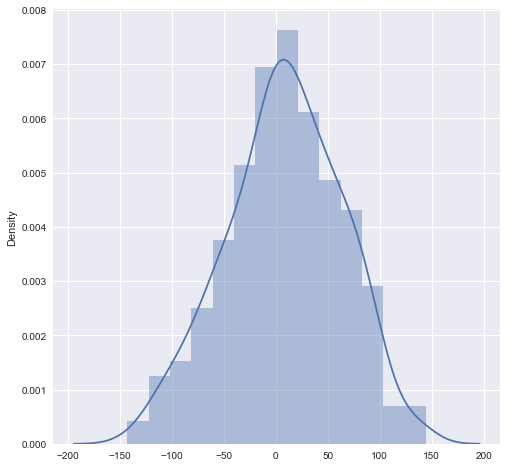

In [90]:
# Plotting the residuals.

plt.figure(figsize = (8,8))
sns.distplot(y_test1-prediction)
plt.show()

# Cross Validation

In [91]:
best_Ada_Boost = AdaBoostRegressor(n_estimators= 100, loss= 'exponential', learning_rate =1, random_state=104)

for i in range(2,11):
    cross_score = cross_val_score(best_Ada_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())

2 mean 0.8443214554419438 and STD 0.009555629109518848
3 mean 0.8492086515080733 and STD 0.006408722736634356
4 mean 0.8476405781779779 and STD 0.010834588125154383
5 mean 0.8494251839238531 and STD 0.011282459225452415
6 mean 0.8479310962999165 and STD 0.015742375342086924
7 mean 0.845274131430127 and STD 0.021166154396682322
8 mean 0.8469293653677799 and STD 0.024957283297494973
9 mean 0.8476671999403956 and STD 0.027442190645623893
10 mean 0.8496127177699639 and STD 0.02682516694571256


In [92]:
# Selecting Cv score as 10

# Cross validate of GradientBoostingRegressor using cv=10
from sklearn.model_selection import cross_val_score
score=cross_val_score(best_Ada_Boost,X,y,cv=10,scoring='r2')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.8410553  0.87217638 0.87497133 0.81981079 0.88227262 0.79766244
 0.86755785 0.87187117 0.83019316 0.83855615]
Mean Score: 0.8496127177699639
Standard Deviation: 0.02682516694571256


Plotting y_test vs predictions.

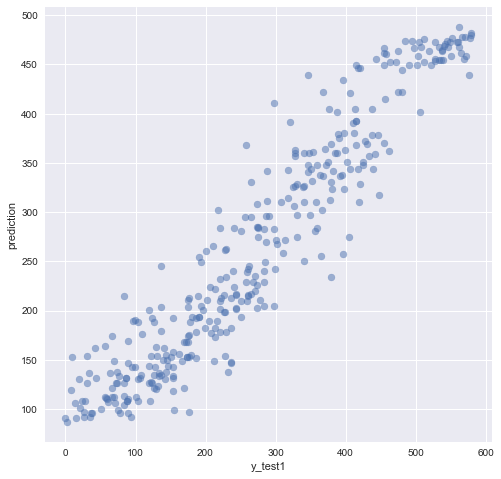

In [93]:
plt.figure(figsize = (8,8))
plt.scatter(y_test1, prediction, alpha = 0.5,)
plt.xlabel("y_test1")
plt.ylabel("prediction")
plt.show()

# Saving Model

In [94]:
import pickle
# Saving the AdaBoostRegressor
best_Ada_Boost.fit(X,y)
pred = best_Ada_Boost.predict(price_test)

# Saving model

filename = "House_Saleprice_Prediction.pkl"

with open(filename,"wb") as f:
    pickle.dump(best_Ada_Boost,f)

In [95]:
loaded_model=pickle.load(open('House_Saleprice_Prediction.pkl','rb'))

In [96]:
Test_pred=loaded_model.predict(price_test)
Y_tst=pd.DataFrame(data=Test_pred)

Y_tst

0
0    474.281250
1    415.678815
2    445.973958
3    284.173469
4    311.841530
5     96.610778
6    165.640000
7    432.096296
8    420.918773
9    251.873563
10    86.751111
11   174.660494
12   120.816594
13   237.048544
14   448.352577
15   135.407407
16   128.127796
17   123.441048
18   265.881356
19   359.910156
20   243.392670
21   181.666667
22   200.520270
23    88.602679
24   119.296992
25   158.492424
26   236.675900
27   156.915254
28   213.975089
29   103.572581
30   213.770270
31   316.845494
32   394.938424
33   218.392000
34   113.057143
35   269.029091
36   305.604938
37   134.145946
38   213.690476
39   204.155000
40    99.450549
41   474.352941
42   345.579470
43   333.530220
44   164.873684
45   174.660494
46   114.470588
47   108.204082
48   385.510204
49   447.080760
50   190.770171
51   301.177215
52    91.171103
53    90.072368
54   422.852590
55   171.436620
56   192.439252
57   305.128906
58   112.724138
59   386.009940
60   106.369942
61   291.896907
62   138.497253
63   212.627027
64   369.382653
65   106.369942
66   204.431373
67   368.710145
68   193.702857
69   216.071429
70   443.366534
71   208.388889
72   312.039326
73   203.847926
74   207.754098
75   412.750000
76   459.909333
77   334.651408
78   448.352577
79   190.977778
80   305.604938
81   191.463235
82   199.573099
83   207.471311
84   305.128906
85   383.084158
86   102.338182
87   476.234848
88   207.471311
89   245.429091
90   367.962025
91   178.652632
92   180.885932
93   139.561798
94   285.968641
95   242.166667
96   422.360902
97   284.915254
98   451.657205
99   128.127796
100  439.888889
101   96.610778
102  138.497253
103  190.770171
104  345.579470
105  199.314516
106  431.823684
107  181.666667
108  291.727273
109  326.130841
110  271.280851
111  231.720539
112  368.666667
113  362.964103
114  127.104478
115  108.204082
116  170.411765
117  291.630769
118  207.754098
119   96.610778
120  127.104478
121  333.674584
122  422.393064
123  159.176471
124  191.463235
125  333.674584
126  128.127796
127  222.987654
128   93.741463
129  127.845697
130  171.436620
131  387.083333
132  205.179612
133  208.388889
134  305.128906
135  474.845000
136  370.475983
137  118.859712
138  474.845000
139  128.127796
140  137.511111
141  489.424658
142   96.777273
143  474.281250
144  291.896907
145  354.585903
146  250.186441
147  114.470588
148   88.602679
149  335.275568
150  204.431373
151  204.431373
152  316.845494
153  113.057143
154  102.338182
155  269.657658
156  285.968641
157  252.056338
158  171.200000
159  257.153846
160  377.559809
161  193.702857
162  333.565574
163  128.127796
164  138.521739
165  425.369469
166  300.067729
167  332.341880
168  158.492424
169  311.841530
170  209.115044
171  119.296992
172  138.521739
173  437.674847
174  156.915254
175  481.408955
176  145.011628
177  114.404531
178  223.685864
179  207.754098
180  344.197044
181  216.197279
182  439.888889
183  266.362500
184  476.837500
185  474.352941
186  377.559809
187  108.204082
188  243.034221
189  177.126984
190  140.793103
191  377.559809
192  345.579470
193  113.064327
194  197.629268
195   96.610778
196  252.195652
197  304.163265
198  131.553763
199  210.537037
200  217.968254
201  131.553763
202  431.823684
203  427.468085
204  139.877888
205  135.584906
206  422.852590
207  181.666667
208  154.443182
209  263.396313
210  106.369942
211  216.504950
212  212.627027
213  333.530220
214  108.055556
215  304.163265
216  212.627027
217  147.941341
218  151.675676
219  248.059603
220  366.309278
221  387.083333
222  412.784722
223  158.492424
224  285.968641
225  474.845000
226  292.704762
227  101.565217
228  474.845000
229  248.059603
230  127.845697
231  204.155000
232   95.595855
233  180.291667
234  138.521739
235  335.128205
236  257.153846
237  200.520270
238  405.873188
239  269.029091
240  395.193396
241  200.520270
242  436.658793
243   95.595855
244  200.731343
245  386.009940
246  344.197044
247  439.888889
248  147.016667
249  197.62926

In [97]:
df_test.shape, Y_tst.shape

((292, 79), (292, 1))

In [98]:
df_test['SalePrice']=Y_tst
df_test

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0            20       RL    86.000000    14157   Pave  Not available      IR1   
1           120       RL    66.425101     5814   Pave  Not available      IR1   
2            20       RL    66.425101    11838   Pave  Not available      Reg   
3            70       RL    75.000000    12000   Pave  Not available      Reg   
4            60       RL    86.000000    14598   Pave  Not available      IR1   
5           180       RM    21.000000     1936   Pave  Not available      Reg   
6           180       RM    35.000000     3675   Pave  Not available      Reg   
7            20       RL   107.000000    13891   Pave  Not available      Reg   
8            80       RL    66.425101    12800   Pave  Not available      Reg   
9           120       RM    32.000000     4500   Pave  Not available      Reg   
10           30       RM    60.000000     6324   Pave  Not available      IR1   
11           20       RL    66.425101     9503   Pave  Not available      Reg   
12           20       RL   100.000000    21750   Pave  Not available      Reg   
13           20       RL    50.000000    35133   Grvl  Not available      Reg   
14           20       RL   110.000000    14226   Pave  Not available      Reg   
15           50       RL    50.000000     8405   Pave           Grvl      Reg   
16           20       RL    66.425101     8780   Pave  Not available      IR1   
17           20       RL    70.000000     9100   Pave  Not available      Reg   
18          160       FV    35.000000     3735   Pave  Not available      Reg   
19          160       RL    44.000000     5306   Pave  Not available      IR1   
20           70       RM    50.000000     9000   Pave  Not available      Reg   
21           20       RL    71.000000     8197   Pave  Not available      Reg   
22           20       RL    66.425101    10355   Pave  Not available      IR1   
23          190       RM    70.000000     5600   Pave  Not available      Reg   
24           30       RL    52.000000     6292   Pave  Not available      Reg   
25           20       RL    37.000000     6951   Pave  Not available      IR1   
26           60       RL    62.000000     7917   Pave  Not available      Reg   
27           20       RL    78.000000     7800   Pave  Not available      Reg   
28           60       RL    90.000000    11700   Pave  Not available      Reg   
29           30       RM    60.000000     9786   Pave  Not available      Reg   
30           90       RM    68.000000     8930   Pave  Not available      Reg   
31           20       RL    67.000000    10083   Pave  Not available      Reg   
32           20       RL    70.000000     9100   Pave  Not available      Reg   
33           20       RL    80.000000    11900   Pave  Not available      IR1   
34           30       RL    52.000000     9022   Pave  Not available      Reg   
35           80       RL    76.000000     9967   Pave  Not available      IR1   
36           60       RL    70.000000     8462   Pave  Not available      IR1   
37          160       RM    21.000000     1680   Pave  Not available      Reg   
38           60       RL    66.425101    12936   Pave  Not available      IR1   
39          160       RL    24.000000     2289   Pave  Not available      Reg   
40           20       RM    50.000000     6000   Pave  Not available      Reg   
41           60       RL    80.000000     9200   Pave  Not available      Reg   
42           60       RL    66.425101    12394   Pave  Not available      IR1   
43           20       FV    62.000000     7500   Pave           Pave      Reg   
44           85       RL    57.000000     8846   Pave  Not available      IR1   
45           50       RM    52.000000     6240   Pave  Not available      Reg   
46           20       RL    70.000000     7560   Pave  Not available      Reg   
47           30       RM    30.000000     5232   Pave           Grvl      IR3   
48          120       RL    34.00000